# Load the segmented trips

In [2]:
import matplotlib.pyplot as plt

In [3]:
# road_df['trip_id']

In [5]:
import os
import json
import pandas as pd

# Initialize empty dataframes
road_df_list = []
second_segment_df_list = []

# Iterate over each dateID in the specified range (24 to 30)
for date_id in range(24, 31):
    # Generate filenames with dateID + 1 (to match the desired format)
    road_file_name = f'Splitting/Segmented Trial Week/Segmented_Trips_01_{date_id + 1}.json'
    segment_file_name = f'Splitting/Segmented Trial Week/Merchants_Segments_01_{date_id + 1}.json'
    
    # Check if the JSON files already exist
    if os.path.exists(road_file_name) and os.path.exists(segment_file_name):
        print(f"Loading segments from '{road_file_name}' and '{segment_file_name}'")
        
        # Load road segments from JSON
        with open(road_file_name, 'r') as file:
            road_json = [json.loads(line) for line in file]
        road_df_filtered = pd.DataFrame(road_json)
        
        # Load merchant segments from JSON
        with open(segment_file_name, 'r') as file:
            second_seg_json = [json.loads(line) for line in file]
        second_segment_df_filtered = pd.DataFrame(second_seg_json)
    
    else:
        # display that the files do not exist
        print(f"Files '{road_file_name}' and '{segment_file_name}' do not exist.")
    
    # Append filtered data to lists
    road_df_list.append(road_df_filtered)
    second_segment_df_list.append(second_segment_df_filtered)

# Concatenate all filtered dataframes
road_df = pd.concat(road_df_list, ignore_index=True)
second_segment_df = pd.concat(second_segment_df_list, ignore_index=True)

# Print columns for verification
# print(road_df.columns)
# print(second_segment_df.columns)


Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_25.json' and 'Splitting/Segmented Trial Week/Merchants_Segments_01_25.json'
Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_26.json' and 'Splitting/Segmented Trial Week/Merchants_Segments_01_26.json'
Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_27.json' and 'Splitting/Segmented Trial Week/Merchants_Segments_01_27.json'
Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_28.json' and 'Splitting/Segmented Trial Week/Merchants_Segments_01_28.json'
Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_29.json' and 'Splitting/Segmented Trial Week/Merchants_Segments_01_29.json'
Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_30.json' and 'Splitting/Segmented Trial Week/Merchants_Segments_01_30.json'
Loading segments from 'Splitting/Segmented Trial Week/Segmented_Trips_01_31.json' and 'Splitting/Segmented

# Remove the trips with distances greater than 50 km

In [6]:
# display trips that have dist value greater than 20
len(road_df[road_df['dist'] >= 20])

169

In [7]:
len(road_df)

64611

In [8]:
road_df.describe()

,dist,trip_time,weekID,timeID,dateID,time_offset,segmentID
count,64611.000000,64611.000000,64611.000000,64611.000000,64611.000000,64611.000000,64611.000000
mean,4.245647,545.493941,2.995945,882.030065,26.887450,462.391729,2.081147
std,25.907593,437.792605,1.946319,280.359040,2.044701,537.200286,0.996710
min,0.000000,0.000000,0.000000,3.000000,24.000000,0.000000,1.000000
25%,0.883395,208.500000,1.000000,686.000000,25.000000,0.000000,1.000000
50%,2.373664,432.000000,3.000000,904.200000,27.000000,344.000000,3.000000
75%,5.662286,780.000000,5.000000,1094.900000,29.000000,815.000000,3.000000
max,2872.321048,4980.000000,6.000000,1437.400000,30.000000,6442.000000,3.000000


In [9]:
# drop entries that have dist greater than 20
road_df = road_df[road_df['dist'] <= 20]

In [10]:
len(road_df[road_df['dist'] < 20])

64442

# Generate the two-hour segment

In [11]:
# Define 2-hour segment ranges (in minutes)
two_hour_segments = [(i * 120, (i + 1) * 120) for i in range(12)]  # Each tuple is a (start, end) range in minutes
two_hour_labels = [f"{str(i*2).zfill(2)}:00 - {str(i*2+2).zfill(2)}:00" for i in range(12)]  # Two-hour labels in "HH:MM - HH:MM" format

# Function to determine which 2-hour segment a timeID belongs to
def get_two_hour_segment(timeID):
    for idx, (start, end) in enumerate(two_hour_segments):
        if start <= timeID < end:
            return two_hour_labels[idx]  # Return the corresponding 2-hour label
    return None  # Return None if the timeID is outside the 0-1440 range (but it shouldn't happen)

# Apply the 2-hour segment function to assign each row to a 2-hour segment based on timeID
road_df['two_hour_segment'] = road_df['timeID'].apply(get_two_hour_segment)

# Group by the 'two_hour_segment' column and count the number of rows (orders) in each segment
orders_per_two_hour_segment = road_df.groupby('two_hour_segment').size().reset_index(name='order_count')


In [12]:
os.getcwd()

'd:\\Senior Project - Main Workspace\\eta-rfr'

In [13]:
# change directory to "Clustering"
os.chdir("Clustering_Experiments")

In [14]:
# Define 1-hour segment ranges (in minutes)
hour_segments = [(i * 60, (i + 1) * 60) for i in range(24)]  # Each tuple is a (start, end) range in minutes
hour_labels = [f"{str(i).zfill(2)}:00 - {str(i+1).zfill(2)}:00" for i in range(24)]  # Hour labels in "HH:MM - HH:MM" format

# Function to determine which hour segment a timeID belongs to
def get_hour_segment(timeID):
    for idx, (start, end) in enumerate(hour_segments):
        if start <= timeID < end:
            return hour_labels[idx]  # Return the corresponding hour label
    return None  # Return None if the timeID is outside the 0-1440 range (but it shouldn't happen)

# Apply the hour segment function to assign each row to an hourly segment based on timeID
road_df['hour'] = road_df['timeID'].apply(get_hour_segment)

# Group by the 'hour' column and count the number of rows (orders) in each hour
orders_per_hour = road_df.groupby('hour').size().reset_index(name='order_count')

# Write the result to a CSV file
output_file_path = 'orders_per_hour_segment_trial_week.csv'
orders_per_hour.to_csv(output_file_path, index=False)

print(f"Results have been saved to {output_file_path}")


Results have been saved to orders_per_hour_segment_trial_week.csv


# Clustering

## DBSCAN

### Determine the best values of the hyperparameters

In [16]:
from sklearn.neighbors import NearestNeighbors

In [17]:
# from sklearn.neighbors import NearestNeighbors
# import numpy as np
# # import matplotlib.pyplot as plt

# # Step 1: Flatten the coordinates for clustering
# all_lats = [lat for sublist in road_df['lats'] for lat in sublist]
# all_lngs = [lng for sublist in road_df['lngs'] for lng in sublist]
# coords = np.array(list(zip(all_lats, all_lngs)))

# # Step 1: Fit NearestNeighbors model to find k-nearest neighbors
# # 'coords' is the array of coordinates you want to cluster (lats and lngs)
# k = 4  # Set k to be equal to min_samples
# nearest_neighbors = NearestNeighbors(n_neighbors=k)
# neighbors = nearest_neighbors.fit(coords)
# distances, indices = neighbors.kneighbors(coords)

# # Step 2: Sort the distances and plot them
# # We're interested in the distance to the k-th nearest neighbor for each point
# distances = np.sort(distances[:, k-1], axis=0)
# plt.plot(distances)
# plt.ylabel('k-NN Distance')
# plt.xlabel('Points sorted by distance to k-th nearest neighbor')
# plt.title('k-distance Graph for DBSCAN')
# plt.show()


### Actual Clustering Implementation

In [18]:
import numpy as np
# Step 1: Flatten the coordinates for clustering
all_lats = [lat for sublist in road_df['lats'] for lat in sublist]
all_lngs = [lng for sublist in road_df['lngs'] for lng in sublist]
coords = np.array(list(zip(all_lats, all_lngs)))

In [19]:
len(coords)

5485350

In [20]:
coords.shape

(5485350, 2)

In [21]:
coords[0]

array([31.907, 35.859])

In [22]:
unique_pairs = np.unique(coords, axis=0)
num_unique_pairs = len(unique_pairs)

print(f'Number of unique coordinate pairs: {num_unique_pairs}')

Number of unique coordinate pairs: 28468


In [23]:
# Filter out duplicate coordinate pairs
unique_coords = np.unique(coords, axis=0)

# Now, run DBSCAN on the unique coordinate pairs
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering on unique coordinates
dbscan = DBSCAN(eps=0.001, min_samples=4)
cluster_labels = dbscan.fit_predict(unique_coords)

# Print the number of clusters (excluding noise points labeled -1)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f'Estimated number of clusters: {n_clusters}')


Estimated number of clusters: 2470


In [24]:
# Create a mapping from coordinates to cluster labels
coord_to_cluster = dict(zip(map(tuple, coords), cluster_labels))

# Step 3: Assign cluster IDs to road_df for the start and end points
def get_cluster_id(lat, lon):
    return coord_to_cluster.get((lat, lon), None)

road_df['start_cluster'] = [get_cluster_id(row['lats'][0], row['lngs'][0]) for _, row in road_df.iterrows()]
road_df['end_cluster'] = [get_cluster_id(row['lats'][-1], row['lngs'][-1]) for _, row in road_df.iterrows()]


In [25]:
type(cluster_labels)

numpy.ndarray

In [26]:
os.getcwd()

'd:\\Senior Project - Main Workspace\\eta-rfr\\Clustering_Experiments'

In [27]:
#dump cluster labels array to a txt file
np.savetxt('cluster_labels.txt', cluster_labels)


[-1 -1 -1 ... -1 -1 -1]


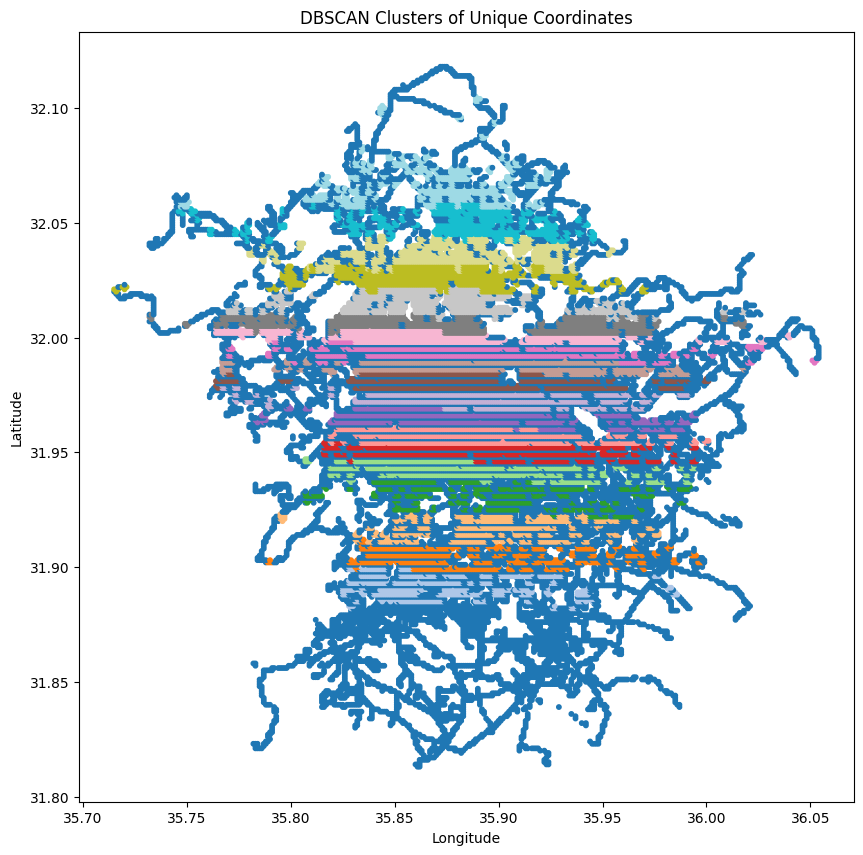

In [28]:
print(cluster_labels)
# Plot the clusters
plt.figure(figsize=(10, 10))
plt.scatter(unique_coords[:, 1], unique_coords[:, 0], c=cluster_labels, cmap='tab20', s=10)
plt.title('DBSCAN Clusters of Unique Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [29]:
import numpy as np
import collections

# Assuming `cluster_labels` contains the cluster assignment for each point
# Count the number of points in each cluster using collections.Counter
cluster_counts = collections.Counter(cluster_labels)

# Print the number of points per cluster
print(f"Number of points per cluster:")
for cluster_label, count in cluster_counts.items():
    if cluster_label == -1:
        print(f"Noise (-1): {count} points")
    else:
        print(f"Cluster {cluster_label}: {count} points")


Number of points per cluster:
Noise (-1): 13335 points
Cluster 0: 4 points
Cluster 1: 4 points
Cluster 2: 6 points
Cluster 3: 4 points
Cluster 5: 4 points
Cluster 4: 6 points
Cluster 7: 4 points
Cluster 6: 6 points
Cluster 8: 4 points
Cluster 10: 4 points
Cluster 11: 4 points
Cluster 12: 4 points
Cluster 13: 4 points
Cluster 9: 4 points
Cluster 14: 4 points
Cluster 15: 4 points
Cluster 16: 4 points
Cluster 17: 7 points
Cluster 18: 2 points
Cluster 19: 4 points
Cluster 21: 4 points
Cluster 20: 6 points
Cluster 22: 4 points
Cluster 23: 4 points
Cluster 24: 4 points
Cluster 25: 4 points
Cluster 26: 4 points
Cluster 31: 4 points
Cluster 32: 4 points
Cluster 27: 4 points
Cluster 33: 4 points
Cluster 28: 6 points
Cluster 29: 6 points
Cluster 30: 4 points
Cluster 34: 6 points
Cluster 35: 6 points
Cluster 38: 4 points
Cluster 36: 4 points
Cluster 37: 4 points
Cluster 39: 6 points
Cluster 40: 6 points
Cluster 43: 4 points
Cluster 41: 6 points
Cluster 42: 6 points
Cluster 44: 4 points
Cluster 45

In [30]:
labels = cluster_labels

### Evaluate the Clustering Performance

#### Silhouette Score

In [31]:
from sklearn.metrics import silhouette_score

# Filter out noise points (-1 labels) before calculating silhouette score
core_samples_mask = labels != -1

if len(set(labels[core_samples_mask])) > 1:  # Check if there are more than 1 cluster
    silhouette_avg = silhouette_score(unique_coords[core_samples_mask], labels[core_samples_mask])
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("Not enough clusters to calculate silhouette score")


Silhouette Score: 0.3796475764636876


#### Number of Clusters and Noise Points

In [32]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Subtract 1 if -1 (noise) is present
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')


Estimated number of clusters: 2470
Estimated number of noise points: 13335


#### Davies-Bouldin Index

In [33]:
from sklearn.metrics import davies_bouldin_score

# Exclude noise points
if len(set(labels[core_samples_mask])) > 1:
    dbi_score = davies_bouldin_score(unique_coords[core_samples_mask], labels[core_samples_mask])
    print(f'Davies-Bouldin Index: {dbi_score}')
else:
    print("Not enough clusters to calculate Davies-Bouldin Index")


Davies-Bouldin Index: 0.6743682741476693


#### Manual Inspection (Visual Evaluation)

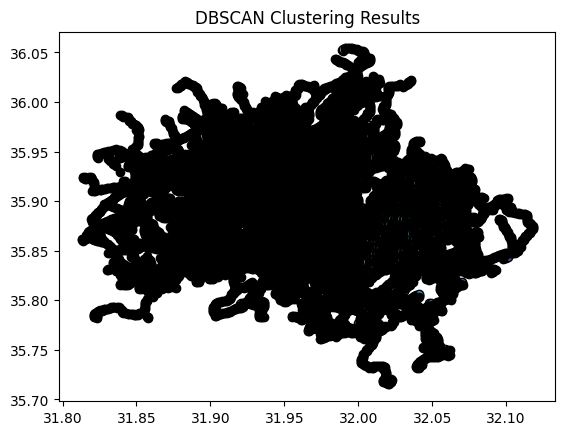

In [34]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = unique_coords[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering Results')
plt.show()


### Visualizing the clusters

In [35]:
import folium
import numpy as np
from shapely.geometry import MultiPoint, Polygon, LineString, Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Import the correct module for colors

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Step 1: Get unique labels (clusters) excluding noise points (-1)
unique_labels = set(cluster_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))  # Generate colors for each cluster
for label, color in zip(unique_labels, colors):
    if label == -1:  # Skip noise points
        continue
    cluster_points = unique_coords[cluster_labels == label]
    
    # Check if cluster has more than 2 points for the convex hull
    if len(cluster_points) > 2:
        hull = MultiPoint(cluster_points).convex_hull
        
        # Handle different geometry types (Polygon, LineString, or Point)
        if isinstance(hull, Polygon):
            hull_coords = list(hull.exterior.coords)
            # Swap coordinates (lat, lon) -> (lon, lat) for folium
            folium.Polygon(locations=[(lon, lat) for lon, lat in hull_coords], 
                           color=mcolors.rgb2hex(color), fill=True, fill_opacity=0.4,
                           tooltip=f'Cluster {label}').add_to(m)
        
        elif isinstance(hull, LineString):
            hull_coords = list(hull.coords)
            # Swap coordinates (lat, lon) -> (lon, lat) for folium
            folium.PolyLine(locations=[(lon, lat) for lon, lat in hull_coords],
                            color=mcolors.rgb2hex(color), weight=3, opacity=0.7,
                            tooltip=f'Cluster {label} (Line)').add_to(m)
        
        elif isinstance(hull, Point):
            # Add the point to the folium map (swapping lon, lat to lat, lon)
            folium.Marker(location=[hull.y, hull.x],
                          icon=folium.Icon(color="blue"),
                          tooltip=f'Cluster {label} (Point)').add_to(m)


# Save the map
m.save('DBSCAN/DBSCAN_clusters_map.html')
print("Map with cluster regions saved as 'DBSCAN_clusters_map.html'.")


Map with cluster regions saved as 'DBSCAN_clusters_map.html'.


In [36]:
import folium
import numpy as np
from shapely.geometry import MultiPoint, Polygon, LineString, Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Import the correct module for colors

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Step 1: Get unique labels (clusters) including noise points (-1)
unique_labels = set(cluster_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels) - 1))  # Exclude noise from color mapping

# Step 2: Plot clusters and handle noise separately
for label, color in zip([l for l in unique_labels if l != -1], colors):
    cluster_points = unique_coords[cluster_labels == label]
    
    # Convex hull calculation for clusters with more than 2 points
    if len(cluster_points) > 2:
        hull = MultiPoint(cluster_points).convex_hull
        
        if isinstance(hull, Polygon):
            hull_coords = list(hull.exterior.coords)
            folium.Polygon(locations=[(lon, lat) for lon, lat in hull_coords], 
                           color=mcolors.rgb2hex(color), fill=True, fill_opacity=0.4,
                           tooltip=f'Cluster {label}').add_to(m)
        
        elif isinstance(hull, LineString):
            hull_coords = list(hull.coords)
            folium.PolyLine(locations=[(lon, lat) for lon, lat in hull_coords],
                            color=mcolors.rgb2hex(color), weight=3, opacity=0.7,
                            tooltip=f'Cluster {label} (Line)').add_to(m)
            
        elif isinstance(hull, Point):
            # Add the point to the folium map (swapping lon, lat to lat, lon)
            folium.Marker(location=[hull.y, hull.x],
                          icon=folium.Icon(color="blue"),
                          tooltip=f'Cluster {label} (Point)').add_to(m)

# Step 3: Plot the noise points (-1) in a different color
noise_points = unique_coords[cluster_labels == -1]
for coord in noise_points:
    lat, lon = coord[0], coord[1]  # Assuming lat is the first column and lon is the second
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color="gray",  # Gray color for noise points
        fill=True,
        fill_opacity=0.5,
        tooltip='Noise'
    ).add_to(m)

# Save the map
m.save('DBSCAN/DBSCAN_clusters_map_with_noise.html')
print("Map with clusters and noise saved as 'DBSCAN_clusters_map_with_noise.html'.")


Map with clusters and noise saved as 'DBSCAN_clusters_map_with_noise.html'.


### Visualize the coords pre-clustering

In [37]:
import folium
import numpy as np

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Step 1: Plot each point in unique_coords on the map
for coord in unique_coords:
    lat, lon = coord[0], coord[1]  # Swap lat/lon if necessary
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,  # Small radius for individual points
        color="blue",  # Blue color for unclustered points
        fill=True,
        fill_opacity=0.5
    ).add_to(m)

# Save the map
m.save('Raw_Coordinates_Map.html')
print("Map with raw coordinates saved as 'Raw_Coordinates_Map.html'.")


Map with raw coordinates saved as 'Raw_Coordinates_Map.html'.


## OPTICS - failed always gives 1 cluster and the rest are noise


In [ ]:
# from sklearn.cluster import OPTICS
# from sklearn.metrics import silhouette_score, davies_bouldin_score
# import numpy as np

# # Define a range of xi and min_cluster_size values to try
# xi_values = np.linspace(0.05, 0.3, 6)  # Example range of xi values
# min_cluster_sizes = np.linspace(0.05, 0.2, 4)  # Example range of min_cluster_size values

# # Store results
# best_xi = None
# best_min_cluster_size = None
# best_silhouette = -1  # Start with a low silhouette score for comparison
# best_davies_bouldin = float('inf')

# # Iterate over xi and min_cluster_size combinations
# for xi in xi_values:
#     for min_cluster_size in min_cluster_sizes:
#         # Fit the OPTICS model
#         optics_model = OPTICS(min_samples=10, xi=xi, min_cluster_size=min_cluster_size)
#         optics_model.fit(unique_coords)
        
#         # Get the cluster labels
#         optics_labels = optics_model.labels_
        
#         # Only evaluate clusters if more than one cluster is found
#         n_clusters = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
#         if n_clusters > 1:
#             # Calculate silhouette score (only works if there are multiple clusters)
#             silhouette_avg = silhouette_score(unique_coords, optics_labels)
            
#             # Calculate Davies-Bouldin score (lower is better)
#             davies_bouldin_avg = davies_bouldin_score(unique_coords, optics_labels)
            
#             # Update the best parameters based on the silhouette score or Davies-Bouldin
#             if silhouette_avg > best_silhouette:
#                 best_silhouette = silhouette_avg
#                 best_xi = xi
#                 best_min_cluster_size = min_cluster_size
#             if davies_bouldin_avg < best_davies_bouldin:
#                 best_davies_bouldin = davies_bouldin_avg
#                 best_xi = xi
#                 best_min_cluster_size = min_cluster_size

# print(f"Best xi: {best_xi}, Best min_cluster_size: {best_min_cluster_size}")
# print(f"Best Silhouette Score: {best_silhouette}")
# print(f"Best Davies-Bouldin Score: {best_davies_bouldin}")


In [ ]:
# from sklearn.cluster import OPTICS

# # Assuming 'unique_coords' contains your dataset of coordinates (latitude and longitude)

# # Step 1: Initialize the OPTICS model
# optics_model = OPTICS(min_samples=9, xi=0.5, min_cluster_size=0.01, metric='manhattan')

# # Step 2: Fit the model to the coordinates
# optics_model.fit(unique_coords)

# # Step 3: Get the cluster labels assigned by OPTICS
# optics_labels = optics_model.labels_

# # Step 4: Print the number of clusters (excluding noise points)
# n_clusters_optics = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
# print(f'Estimated number of clusters: {n_clusters_optics}')

# # Print the number of points in each cluster
# from collections import Counter
# optics_counts = Counter(optics_labels)
# print("Points per cluster:", optics_counts)


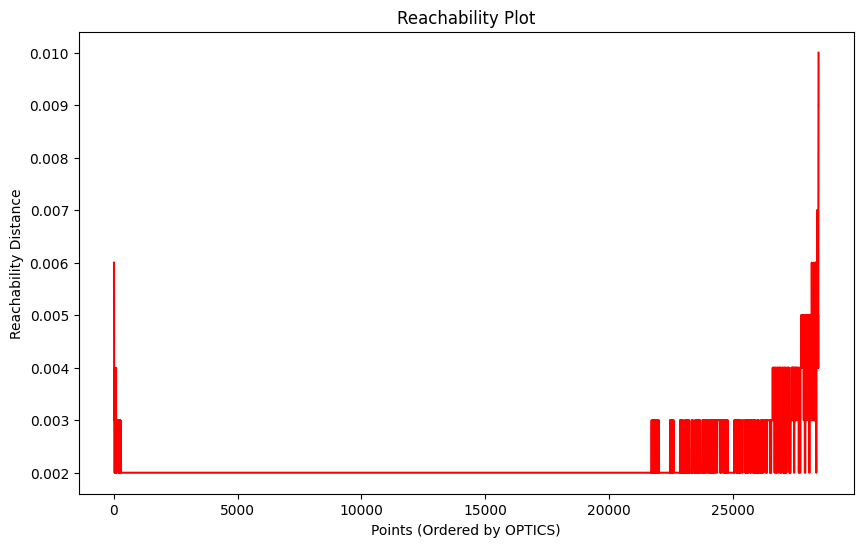

In [ ]:
# import matplotlib.pyplot as plt

# # Reachability plot
# space = np.arange(len(unique_coords))
# reachability = optics_model.reachability_[optics_model.ordering_]

# plt.figure(figsize=(10, 6))
# plt.plot(space, reachability, 'r-', label='Reachability Distance')
# plt.xlabel('Points (Ordered by OPTICS)')
# plt.ylabel('Reachability Distance')
# plt.title('Reachability Plot')
# plt.show()


### Visualizing the Results

In [ ]:
# import folium
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors

# # Create a folium map centered around the average coordinates of your data
# avg_lat = np.mean(unique_coords[:, 0])
# avg_lon = np.mean(unique_coords[:, 1])
# m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# # Get unique labels (clusters including noise)
# unique_labels_optics = set(optics_labels)
# colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels_optics) - 1))  # Exclude noise from color mapping

# # Plot clusters
# for label, color in zip([l for l in unique_labels_optics if l != -1], colors):
#     cluster_points = unique_coords[optics_labels == label]
    
#     if len(cluster_points) > 2:  # Convex hull calculation for clusters with more than 2 points
#         hull = MultiPoint(cluster_points).convex_hull
        
#         if isinstance(hull, Polygon):
#             hull_coords = list(hull.exterior.coords)
#             folium.Polygon(locations=[(lon, lat) for lon, lat in hull_coords],
#                            color=mcolors.rgb2hex(color), fill=True, fill_opacity=0.4,
#                            tooltip=f'Cluster {label}').add_to(m)
        
#         elif isinstance(hull, LineString):
#             hull_coords = list(hull.coords)
#             folium.PolyLine(locations=[(lon, lat) for lon, lat in hull_coords],
#                             color=mcolors.rgb2hex(color), weight=3, opacity=0.7,
#                             tooltip=f'Cluster {label} (Line)').add_to(m)

# # Plot noise points in gray
# noise_points = unique_coords[optics_labels == -1]
# for coord in noise_points:
#     lat, lon = coord[0], coord[1]  # Assuming lat is the first column and lon is the second
#     folium.CircleMarker(
#         location=[lat, lon],
#         radius=2,
#         color="gray",  # Gray color for noise points
#         fill=True,
#         fill_opacity=0.5,
#         tooltip='Noise'
#     ).add_to(m)

# # Save the map
# m.save('OPTICS/OPTICS_clusters_map_with_noise.html')
# print("Map with clusters and noise saved as 'OPTICS_clusters_map_with_noise.html'.")


Map with clusters and noise saved as 'OPTICS_clusters_map_with_noise.html'.


# Grid Based Clustering

## STING

In [38]:
import numpy as np
import folium
from sklearn.cluster import KMeans

def sting_clustering(coords, grid_size=0.005):
    # Create grid cells by binning the lat/lng coordinates
    lat_bins = np.arange(min(coords[:, 0]), max(coords[:, 0]) + grid_size, grid_size)
    lon_bins = np.arange(min(coords[:, 1]), max(coords[:, 1]) + grid_size, grid_size)
    
    # Assign each point to a grid cell (using binning)
    lat_grid = np.digitize(coords[:, 0], lat_bins)
    lon_grid = np.digitize(coords[:, 1], lon_bins)
    
    # Combine lat_grid and lon_grid to create unique grid cell IDs
    grid_cells = np.vstack((lat_grid, lon_grid)).T
    unique_cells = np.unique(grid_cells, axis=0)
    
    # Cluster points within each cell using KMeans
    cluster_labels = np.zeros(len(coords)) - 1  # Initialize as noise (-1)
    cluster_id = 0
    
    for cell in unique_cells:
        cell_mask = (lat_grid == cell[0]) & (lon_grid == cell[1])
        cell_points = coords[cell_mask]
        
        if len(cell_points) > 5:  # Only cluster if there are enough points
            kmeans = KMeans(n_clusters=2)  # You can adjust the number of clusters per grid cell
            labels = kmeans.fit_predict(cell_points)
            cluster_labels[cell_mask] = labels + cluster_id
            cluster_id += 2  # Increment cluster ID
    
    return cluster_labels

# Apply STING clustering
sting_labels = sting_clustering(unique_coords, grid_size=0.005)

# Visualize STING clusters on a folium map
def visualize_clusters_on_map(coords, labels):
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    m = folium.Map(location=[np.mean(coords[:, 0]), np.mean(coords[:, 1])], zoom_start=12)
    
    for label, color in zip(unique_labels, colors):
        cluster_points = coords[labels == label]
        for coord in cluster_points:
            lat, lon = coord[0], coord[1]
            folium.CircleMarker(
                location=[lat, lon],
                radius=2,
                color=mcolors.rgb2hex(color),
                fill=True,
                fill_opacity=0.5
            ).add_to(m)
    
    # Save the map
    m.save('sting_clusters_map_005.html')
    print(f"STING Clustering: Map saved to 'sting_clusters_map.html'")
    return m

# Visualize STING results
m = visualize_clusters_on_map(unique_coords, sting_labels)

# Evaluate STING Clustering
print(f'Number of clusters: {len(set(sting_labels)) - (1 if -1 in sting_labels else 0)}')
print(f'Number of noise points: {np.sum(sting_labels == -1)}')


STING Clustering: Map saved to 'sting_clusters_map.html'
Number of clusters: 3266
Number of noise points: 1211


In [39]:
import folium
import numpy as np
from shapely.geometry import MultiPoint, Polygon, LineString, Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Import the correct module for colors

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Step 1: Get unique labels (clusters) including noise points (-1)
unique_labels = set(sting_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels) - 1))  # Exclude noise from color mapping

# Step 2: Plot clusters and handle noise separately
for label, color in zip([l for l in unique_labels if l != -1], colors):
    cluster_points = unique_coords[sting_labels == label]
    
    # Convex hull calculation for clusters with more than 2 points
    if len(cluster_points) > 2:
        hull = MultiPoint(cluster_points).convex_hull
        
        if isinstance(hull, Polygon):
            hull_coords = list(hull.exterior.coords)
            folium.Polygon(locations=[(lon, lat) for lon, lat in hull_coords], 
                           color=mcolors.rgb2hex(color), fill=True, fill_opacity=0.4,
                           tooltip=f'Cluster {label}').add_to(m)
        
        elif isinstance(hull, LineString):
            hull_coords = list(hull.coords)
            folium.PolyLine(locations=[(lon, lat) for lon, lat in hull_coords],
                            color=mcolors.rgb2hex(color), weight=3, opacity=0.7,
                            tooltip=f'Cluster {label} (Line)').add_to(m)
            
        elif isinstance(hull, Point):
            # Add the point to the folium map (swapping lon, lat to lat, lon)
            folium.Marker(location=[hull.y, hull.x],
                          icon=folium.Icon(color="blue"),
                          tooltip=f'Cluster {label} (Point)').add_to(m)

# Step 3: Plot the noise points (-1) in a different color
noise_points = unique_coords[sting_labels == -1]
for coord in noise_points:
    lat, lon = coord[0], coord[1]  # Assuming lat is the first column and lon is the second
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color="gray",  # Gray color for noise points
        fill=True,
        fill_opacity=0.5,
        tooltip='Noise'
    ).add_to(m)

# Save the map
m.save('STING_005_clusters_map_with_noise.html')
print("Map with clusters and noise saved as 'DBSCAN_clusters_map_with_noise.html'.")


Map with clusters and noise saved as 'DBSCAN_clusters_map_with_noise.html'.


## CLIQUE

In [40]:
import numpy as np
import folium
from sklearn.preprocessing import KBinsDiscretizer

def clique_clustering(coords, n_bins=70):
    # Discretize the latitude and longitude into n_bins
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    binned_coords = discretizer.fit_transform(coords)
    
    # Identify dense regions (bins with more than a threshold number of points)
    unique_bins, counts = np.unique(binned_coords, axis=0, return_counts=True)
    
    # Set a threshold for minimum points in a dense region
    threshold = 3
    dense_regions = unique_bins[counts > threshold]
    
    # Assign cluster labels based on bin membership
    cluster_labels = np.zeros(len(coords)) - 1  # Initialize as noise (-1)
    
    for i, coord in enumerate(binned_coords):
        for region in dense_regions:
            if np.array_equal(coord, region):
                cluster_labels[i] = np.where(np.all(dense_regions == region, axis=1))[0][0]
    
    return cluster_labels

# Apply CLIQUE clustering
clique_labels = clique_clustering(unique_coords, n_bins=70)

# Visualize CLIQUE clusters on a folium map
m = visualize_clusters_on_map(unique_coords, clique_labels)

# Evaluate CLIQUE Clustering
print(f'Number of clusters: {len(set(clique_labels)) - (1 if -1 in clique_labels else 0)}')
print(f'Number of noise points: {np.sum(clique_labels == -1)}')


STING Clustering: Map saved to 'sting_clusters_map.html'
Number of clusters: 2038
Number of noise points: 567


threshold = 5 an n bins = 70

In [41]:
import folium
import numpy as np
from shapely.geometry import MultiPoint, Polygon, LineString, Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Import the correct module for colors

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Step 1: Get unique labels (clusters) including noise points (-1)
unique_labels = set(clique_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels) - 1))  # Exclude noise from color mapping

# Step 2: Plot clusters and handle noise separately
for label, color in zip([l for l in unique_labels if l != -1], colors):
    cluster_points = unique_coords[clique_labels == label]
    
    # Convex hull calculation for clusters with more than 2 points
    if len(cluster_points) > 2:
        hull = MultiPoint(cluster_points).convex_hull
        
        if isinstance(hull, Polygon):
            hull_coords = list(hull.exterior.coords)
            folium.Polygon(locations=[(lon, lat) for lon, lat in hull_coords], 
                           color=mcolors.rgb2hex(color), fill=True, fill_opacity=0.4,
                           tooltip=f'Cluster {label}').add_to(m)
        
        elif isinstance(hull, LineString):
            hull_coords = list(hull.coords)
            folium.PolyLine(locations=[(lon, lat) for lon, lat in hull_coords],
                            color=mcolors.rgb2hex(color), weight=3, opacity=0.7,
                            tooltip=f'Cluster {label} (Line)').add_to(m)
            
        elif isinstance(hull, Point):
            # Add the point to the folium map (swapping lon, lat to lat, lon)
            folium.Marker(location=[hull.y, hull.x],
                          icon=folium.Icon(color="blue"),
                          tooltip=f'Cluster {label} (Point)').add_to(m)

# Step 3: Plot the noise points (-1) in a different color
noise_points = unique_coords[clique_labels == -1]
for coord in noise_points:
    lat, lon = coord[0], coord[1]  # Assuming lat is the first column and lon is the second
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color="gray",  # Gray color for noise points
        fill=True,
        fill_opacity=0.5,
        tooltip='Noise'
    ).add_to(m)

# Save the map
m.save('CLIQUE_70_3_clusters_map_with_noise.html')
print("Map with clusters and noise saved.")


Map with clusters and noise saved.


# Hierarchical Clustering - Agglomerative

In [42]:
# from sklearn.cluster import AgglomerativeClustering

# # Apply Hierarchical (Agglomerative) Clustering
# hierarchical_model = AgglomerativeClustering(n_clusters=None, distance_threshold=0.009)  # Adjust distance_threshold
# hierarchical_labels = hierarchical_model.fit_predict(unique_coords)

# # Visualize Hierarchical Clusters on a folium map
# m = visualize_clusters_on_map(unique_coords, hierarchical_labels)

# # Evaluate Hierarchical Clustering
# print(f'Number of clusters: {len(set(hierarchical_labels))}')
# print(f'Number of noise points: {np.sum(hierarchical_labels == -1)}')  # Agglomerative doesn't usually label noise


In [43]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram, linkage

# # Assuming `unique_coords` contains the coordinates (latitude, longitude)
# # Step 1: Perform hierarchical clustering using `linkage` method
# Z = linkage(unique_coords, method='ward')  # 'ward' minimizes the variance within clusters

# # Step 2: Plot the dendrogram
# plt.figure(figsize=(10, 7))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Data Points')
# plt.ylabel('Distance')
# dendrogram(Z, truncate_mode='level', p=5)  # Truncate to show the top p levels of the hierarchy
# plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances

# Step 1: Perform Agglomerative Clustering and Fit the Model
# Here, unique_coords is the array with your latitude and longitude coordinates
# Adjust the distance threshold to control cluster granularity

distance_threshold = 0.009  # Adjust based on your data (in degrees)
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold)
hierarchical_labels = agg_clustering.fit_predict(unique_coords)

# Step 2: Visualize the Dendrogram using Scipy's `linkage` function
# The linkage method requires pairwise distances, so we'll compute them

# Compute linkage matrix based on pairwise distances
Z = linkage(unique_coords, method='ward')  # 'ward' minimizes variance within clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (Agglomerative Clustering)')
plt.xlabel('Data Points (or Clusters)')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='level', p=5)  # Show the top 5 levels of hierarchy
plt.show()

# Step 3: Print Results
n_clusters = len(set(hierarchical_labels))
print(f'Number of clusters: {n_clusters}')


In [ ]:
import folium
import numpy as np
from shapely.geometry import MultiPoint, Polygon, LineString, Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Import the correct module for colors

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Step 1: Get unique labels (clusters) including noise points (-1)
unique_labels = set(hierarchical_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels) - 1))  # Exclude noise from color mapping

# Step 2: Plot clusters and handle noise separately
for label, color in zip([l for l in unique_labels if l != -1], colors):
    cluster_points = unique_coords[hierarchical_labels == label]
    
    # Convex hull calculation for clusters with more than 2 points
    if len(cluster_points) > 2:
        hull = MultiPoint(cluster_points).convex_hull
        
        if isinstance(hull, Polygon):
            hull_coords = list(hull.exterior.coords)
            folium.Polygon(locations=[(lon, lat) for lon, lat in hull_coords], 
                           color=mcolors.rgb2hex(color), fill=True, fill_opacity=0.4,
                           tooltip=f'Cluster {label}').add_to(m)
        
        elif isinstance(hull, LineString):
            hull_coords = list(hull.coords)
            folium.PolyLine(locations=[(lon, lat) for lon, lat in hull_coords],
                            color=mcolors.rgb2hex(color), weight=3, opacity=0.7,
                            tooltip=f'Cluster {label} (Line)').add_to(m)
            
        elif isinstance(hull, Point):
            # Add the point to the folium map (swapping lon, lat to lat, lon)
            folium.Marker(location=[hull.y, hull.x],
                          icon=folium.Icon(color="blue"),
                          tooltip=f'Cluster {label} (Point)').add_to(m)

# Step 3: Plot the noise points (-1) in a different color
noise_points = unique_coords[hierarchical_labels == -1]
for coord in noise_points:
    lat, lon = coord[0], coord[1]  # Assuming lat is the first column and lon is the second
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color="gray",  # Gray color for noise points
        fill=True,
        fill_opacity=0.5,
        tooltip='Noise'
    ).add_to(m)

# Save the map
m.save('hierarchical_clusters_map_with_noise_009.html')
print("Map with clusters and noise saved.")


Map with clusters and noise saved.


# Find a pattern among trips using the different clustering methods

In [ ]:
len(hierarchical_labels)

28468

In [ ]:
unique_labels = set(hierarchical_labels)
len(unique_labels)

2412

In [ ]:
# List of clustering labels and their corresponding names
clustering_algorithms = {
    'dbscan': cluster_labels,
    'sting': sting_labels,
    'clique': clique_labels,
    'hierarchical': hierarchical_labels
}

# General function to map coordinates to clusters and assign start/end cluster for each algorithm
def assign_clusters(road_df, coords, clustering_labels, label_name):
    coord_to_cluster = dict(zip(map(tuple, coords), clustering_labels))
    
    def get_cluster_id(lat, lon):
        return coord_to_cluster.get((lat, lon), None)
    
    # Assign start and end clusters for the current algorithm
    road_df[f'start_cluster_{label_name}'] = [get_cluster_id(row['lats'][0], row['lngs'][0]) for _, row in road_df.iterrows()]
    road_df[f'end_cluster_{label_name}'] = [get_cluster_id(row['lats'][-1], row['lngs'][-1]) for _, row in road_df.iterrows()]
    road_df[f'same_cluster_{label_name}'] = road_df[f'start_cluster_{label_name}'] == road_df[f'end_cluster_{label_name}']

# Apply the function for each algorithm
for label_name, clustering_labels in clustering_algorithms.items():
    assign_clusters(road_df, coords, clustering_labels, label_name)


In [ ]:
# Define 2-hour segment ranges (in minutes)
two_hour_segments = [(i * 120, (i + 1) * 120) for i in range(12)]  # Each tuple is a (start, end) range in minutes
two_hour_labels = [f"{str(i*2).zfill(2)}:00 - {str(i*2+2).zfill(2)}:00" for i in range(12)]  # Two-hour labels in "HH:MM - HH:MM" format

# Function to determine which 2-hour segment a timeID belongs to
def get_two_hour_segment(timeID):
    for idx, (start, end) in enumerate(two_hour_segments):
        if start <= timeID < end:
            return two_hour_labels[idx]  # Return the corresponding 2-hour label
    return None  # Return None if the timeID is outside the 0-1440 range (but it shouldn't happen)

# Apply the 2-hour segment function to assign each row to a 2-hour segment based on timeID
road_df['two_hour_segment'] = road_df['timeID'].apply(get_two_hour_segment)


In [ ]:
# Define a list to store results for all clustering algorithms
final_trip_categories = []

# Iterate over each algorithm to process trips
for label_name in clustering_algorithms.keys():
    if label_name == 'hierarchical':
        # Step 1: Filter entries where the start and end clusters are different
        df_diff_clusters = road_df[road_df[f'same_cluster_{label_name}'] == False]
        
        # Group trips by start cluster and end cluster
        trip_categories = df_diff_clusters.groupby([f'start_cluster_{label_name}', f'end_cluster_{label_name}']).apply(lambda x: x['trip_id'].tolist())

        # Print categorized trips
        print(f"Categorized trips for {label_name}:")
        for (start_cluster, end_cluster), trips in trip_categories.items():
            print(f"From cluster {start_cluster} to cluster {end_cluster}: {len(trips)} trips - {trips}")

        # Create a unique identifier for each trip by combining 'trip_id' and 'segmentID'
        df_diff_clusters['unique_trip'] = df_diff_clusters['trip_id'].astype(str) + '_' + df_diff_clusters['segmentID'].astype(str)

        # Group trips by start cluster, end cluster, and two-hour segment
        trip_categories = df_diff_clusters.groupby([f'start_cluster_{label_name}', f'end_cluster_{label_name}', 'two_hour_segment']).apply(lambda x: x['unique_trip'].tolist())
        rows_list = []

        # Step 2: Populate the list with the categorized trip information including time
        for (start_cluster, end_cluster, segment), trips in trip_categories.items():
            if len(trips) > 1:
                # Extract the 'time' for the corresponding trips
                trip_times = df_diff_clusters[df_diff_clusters['unique_trip'].isin(trips)]['trip_time'].tolist()

                # Calculate variance and standard deviation for trip times
                if trip_times:
                    variance = np.var(trip_times) / (60**2)  # Variance in minutes
                    std_dev = np.std(trip_times) / 60        # Standard deviation in minutes
                else:
                    variance = None
                    std_dev = None

                rows_list.append({
                    'start_cluster': start_cluster,
                    'end_cluster': end_cluster,
                    'two_hour_segment': segment,
                    'trip_count': len(trips),
                    'trip_times': trip_times,
                    'variance': round(variance, 3),
                    'std': round(std_dev, 3),
                    'trip_ids': trips
                })

        # Step 3: Store the results for the current algorithm
        trip_categories_df = pd.DataFrame(rows_list)
        # Save the DataFrame to a CSV file specific to the current algorithm
        output_csv = f'Clustered_Segmented_Trip_Variances_{label_name}_009.csv'
        trip_categories_df.to_csv(output_csv, index=False)

        print(f"Filtered trip categories for {label_name} with more than 1 trip saved to {output_csv}")

# # Concatenate results for all algorithms
# final_results_df = pd.concat(final_trip_categories, ignore_index=True)

# # Save the DataFrame to a CSV file
# output_csv = 'Clustered_Segmented_Trip_Variances_All_Algorithms.csv'
# final_results_df.to_csv(output_csv, index=False)

# print(f"Filtered trip categories with more than 1 trip saved to {output_csv}")


/tmp/ipykernel_3750039/1984610722.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trip_categories = df_diff_clusters.groupby([f'start_cluster_{label_name}', f'end_cluster_{label_name}']).apply(lambda x: x['trip_id'].tolist())
/tmp/ipykernel_3750039/1984610722.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff_clusters['unique_trip'] = df_diff_clusters['trip_id'].astype(str) + '_' + df_diff_clusters['segmentID'].astype(str)


Categorized trips for hierarchical:
From cluster 1.0 to cluster 17.0: 1 trips - ['70f66cd2bb3fcb0a29dbfe4d8ebbcf8785c6dd7ea6443956f06d272f6bf8f240']
From cluster 1.0 to cluster 32.0: 1 trips - ['0298a07a08347ac8964fc64a3e6093d7e5b562c39119d635a7973ce751d4215a']
From cluster 1.0 to cluster 300.0: 1 trips - ['3e6018c30469fe55620ef002151956b47933822db9fff0308451c3f0dab0644b']
From cluster 1.0 to cluster 424.0: 1 trips - ['a79ead0baf60c5a07c6da65c938d3acdc8972a7a4f7dd896af7eff67ab0e7704']
From cluster 1.0 to cluster 451.0: 1 trips - ['4c5e926587f806b8002653602b9148848891680bcd5f4c5244f7de69c1e08473']
From cluster 1.0 to cluster 590.0: 1 trips - ['1c5ced2bd09753f0063facd896507d4faf280dc3763755744c65230a1b6575eb']
From cluster 1.0 to cluster 596.0: 1 trips - ['dc2dfd52efa65fcaf0cfe73e4ea8bd7f666e3ddd75bc125792a693c9ee3b4556']
From cluster 1.0 to cluster 710.0: 1 trips - ['83b9e770c2bee1ba38fe69a78577479ea69fb565c6687c2d01564d942e5b927b']
From cluster 1.0 to cluster 732.0: 2 trips - ['741e51f

/tmp/ipykernel_3750039/1984610722.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trip_categories = df_diff_clusters.groupby([f'start_cluster_{label_name}', f'end_cluster_{label_name}', 'two_hour_segment']).apply(lambda x: x['unique_trip'].tolist())


Filtered trip categories for hierarchical with more than 1 trip saved to Clustered_Segmented_Trip_Variances_hierarchical_009.csv


In [ ]:
# df_diff_clusters = road_df[road_df['same_cluster'] == False]

In [ ]:
# len(df_diff_clusters)

In [ ]:
# len(road_df[road_df['same_cluster'] == True])

# Inspect Trips between two specific clusters for a specific clustering algorithm

In [ ]:
road_df['unique_trip'] = road_df['trip_id'].astype(str) + '_' + road_df['segmentID'].astype(str)

## Failed Trial

In [ ]:
import folium
import matplotlib.pyplot as plt
import random

def visualize_cluster_routes(road_df, start_cluster, end_cluster, algorithm_name, time_segment):
    # Column names for start and end clusters based on the algorithm
    start_col = f'start_cluster_{algorithm_name}'
    end_col = f'end_cluster_{algorithm_name}'
    
    # Step 1: Filter trips between the specified clusters within the specified time segment
    filtered_trips = road_df[
        (road_df[start_col] == start_cluster) &
        (road_df[end_col] == end_cluster) &
        (road_df['two_hour_segment'] == time_segment)
    ]
    
    # Check if there are any trips matching the criteria
    if filtered_trips.empty:
        print(f"No trips found between clusters {start_cluster} and {end_cluster} within time segment {time_segment} using the {algorithm_name} algorithm.")
        return
    print(filtered_trips)
    # Step 2: Create a map centered around the average coordinates of the trips
    avg_lat = filtered_trips['lats'].apply(lambda x: x[0]).mean()
    avg_lon = filtered_trips['lngs'].apply(lambda x: x[0]).mean()
    m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)
    
    # Step 3: Plot each trip on the map with a unique color
    colors = plt.cm.tab20.colors  # Use a color map with distinct colors
    for idx, (_, trip) in enumerate(filtered_trips.iterrows()):
        # Get the coordinates for each trip (sequence of lat/lon points)
        trip_coords = list(zip(trip['lats'], trip['lngs']))
        
        # Choose a color for this trip
        color = random.choice(colors)  # Randomly select a color from the color map
        color_hex = '#%02x%02x%02x' % (int(color[0]*255), int(color[1]*255), int(color[2]*255))
        
        # Add the PolyLine representing the trip route to the map
        folium.PolyLine(locations=trip_coords, color=color_hex, weight=2.5, opacity=0.8,
                        tooltip=f"Trip ID: {trip['unique_trip']}").add_to(m)
    
    # Step 4: Save map and provide a message
    map_filename = f'Trips_{algorithm_name}_{start_cluster}_to_{end_cluster}_segment_{time_segment}.html'
    m.save(map_filename)
    print(f"Map saved as {map_filename}")


In [ ]:
visualize_cluster_routes(road_df, start_cluster=1816, end_cluster=626, algorithm_name='hierarchical', time_segment="20:00 - 22:00")


                                                 trip_id  \
2174   349e6f16f415e4810d2da90cbc37100d666b1c8c35ca6a...   
4512   69a2240c5ed69c8a32174cd4ecbec66ab99776c58f7e11...   
9476   dcb756d1921722c249d52097649bc76f4506c78d842e6a...   
17568  b1616c71d520722bd2ed8f2871a89642cbc90a58c75ad3...   
18084  c0caa99f01b7dfa701e9f198d1cdf2f3b3e0999f36c91a...   
31884  4823c8f4e83bf9b91fc57df040cea983d56477b92ce7cc...   
46961  0cb1178858833d241d485af4a7ec2dd4a814328282ba50...   
48371  32f9774208b22a4218be425b9b875ae6d963609f3d1ed2...   
61234  9fa018e02909195a386e8366e0252eaed1cd4387d4865f...   
62328  bcecd960005865184f506f1069b4a07cc2a25a59168410...   
63974  ec7d3fc8124ba15dc70a95c237152bb091ca694c319ae3...   

                                                time_gap      dist  trip_time  \
2174   [0.0, 0.0, 19.0, 30.0, 40.0, 50.0, 61.0, 71.0,...  0.283470      258.0   
4512   [0.0, 11.0, 16.0, 22.0, 36.0, 44.0, 54.0, 64.0...  0.283470      363.0   
9476   [0.0, 6.0, 6.0, 17.0, 27.0, 3

In [ ]:
import folium
import matplotlib.pyplot as plt
import random
from shapely.geometry import MultiPoint, Polygon, Point
import matplotlib.colors as mcolors

def visualize_cluster_regions_and_trips(road_df, clusters, algorithm_name, time_segment=None):
    # Column names for start and end clusters based on the algorithm
    start_col = f'start_cluster_{algorithm_name}'
    end_col = f'end_cluster_{algorithm_name}'
    
    # Filter trips by the specified clusters and time segment
    filtered_trips = road_df[
        (road_df[start_col].isin(clusters)) &
        (road_df[end_col].isin(clusters))
    ]
    
    if time_segment is not None:
        filtered_trips = filtered_trips[filtered_trips['two_hour_segment'] == time_segment]
    
    # Check if any trips match the criteria
    if filtered_trips.empty:
        print("No trips found matching the specified criteria.")
        return
    
    # Step 1: Create a map centered around the average coordinates of the filtered trips
    avg_lat = filtered_trips['lats'].apply(lambda x: x[0]).mean()
    avg_lon = filtered_trips['lngs'].apply(lambda x: x[0]).mean()
    m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)
    
    # Step 2: Draw polygons for each cluster region
    color_map = plt.cm.get_cmap('tab20', len(clusters))  # Use distinct colors for each cluster
    cluster_colors = {}
    
    for idx, cluster_id in enumerate(clusters):
        # Filter points that belong to the current cluster
        cluster_points = road_df[
            (road_df[start_col] == cluster_id) | (road_df[end_col] == cluster_id)
        ][['lats', 'lngs']]
        
        # Extract all lat-lng pairs for this cluster
        coords = [(lat, lon) for points in cluster_points[['lats', 'lngs']].values for lat, lon in zip(points[0], points[1])]
        
        # Calculate the convex hull for the cluster region
        if len(coords) >= 3:
            hull = MultiPoint(coords).convex_hull
            if isinstance(hull, Polygon):
                hull_coords = [(lat, lon) for lon, lat in hull.exterior.coords]  # folium uses (lat, lon)
                
                # Color for the cluster polygon
                cluster_color = mcolors.rgb2hex(color_map(idx)[:3])
                cluster_colors[cluster_id] = cluster_color
                
                # Draw polygon
                folium.Polygon(
                    locations=hull_coords,
                    color=cluster_color,
                    fill=True,
                    fill_opacity=0.3,
                    tooltip=f"Cluster {cluster_id}"
                ).add_to(m)
    
    # Step 3: Plot each trip and add to legend with truncated trip names
    legend_html = "<h4>Trip Legend:</h4><ul style='list-style: none; padding-left: 0;'>"
    trip_colors = plt.cm.get_cmap('tab20b', len(filtered_trips))  # Use distinct colors for trips
    for idx, (_, trip) in enumerate(filtered_trips.iterrows()):
        trip_coords = list(zip(trip['lats'], trip['lngs']))
        
        # Choose a color for this trip
        color = mcolors.rgb2hex(trip_colors(idx)[:3])
        
        # Truncate trip name to 5 characters for display in legend
        trip_name = str(trip['unique_trip'])[:5]
        
        # Add the trip line to the map
        folium.PolyLine(
            locations=trip_coords,
            color=color,
            weight=2.5,
            opacity=0.8,
            tooltip=f"Trip ID: {trip['unique_trip']}"
        ).add_to(m)
        
        # Add to legend
        legend_html += f"<li><span style='color: {color}; font-weight: bold;'>&#9679;</span> {trip_name}</li>"
    
    legend_html += "</ul>"
    
    # Step 4: Add the legend to the map
    m.get_root().html.add_child(folium.Element(f"""
        <div style="position: fixed; 
                    bottom: 50px; left: 50px; width: 200px; height: auto; 
                    background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
            {legend_html}
        </div>
    """))
    
    # Save the map
    map_filename = f'Clustered_Trips_{algorithm_name}_clusters_{clusters}_segment_{time_segment}.html'
    m.save(map_filename)
    print(f"Map saved as {map_filename}")

# Example usage:
# visualize_cluster_regions_and_trips(road_df, clusters=[2, 5], algorithm_name='dbscan', time_segment=10)


In [ ]:
# Visualize trips between clusters 2 and 5 using ---- in time segment 10
visualize_cluster_regions_and_trips(road_df, clusters=[1816, 626], algorithm_name='hierarchical', time_segment="20:00 - 22:00")


## Trial 2

In [ ]:
import folium
import matplotlib.pyplot as plt
import random
from shapely.geometry import MultiPoint, Polygon, Point
import matplotlib.colors as mcolors

def visualize_cluster_regions_and_trips(road_df, start_cluster, end_cluster, algorithm_name, time_segment=None):

    # Column names for start and end clusters based on the algorithm
    start_col = f'start_cluster_{algorithm_name}'
    end_col = f'end_cluster_{algorithm_name}'
    
    # Filter trips between the specified clusters and time segment
    filtered_trips = road_df[
        (road_df[start_col] == start_cluster) &
        (road_df[end_col] == end_cluster)
    ]
    
    if time_segment is not None:
        filtered_trips = filtered_trips[filtered_trips['two_hour_segment'] == time_segment]
    
    # Check if any trips match the criteria
    if filtered_trips.empty:
        print(f"No trips found between clusters {start_cluster} and {end_cluster} using the {algorithm_name} algorithm.")
        return
    
    print(filtered_trips)
    
    # Step 1: Create a map centered around the average coordinates of the filtered trips
    avg_lat = filtered_trips['lats'].apply(lambda x: x[0]).mean()
    avg_lon = filtered_trips['lngs'].apply(lambda x: x[0]).mean()
    m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)
    
    # Step 2: Define a color for each cluster and draw shaded regions for the start and end clusters
    color_map = plt.cm.get_cmap('tab20', 2)  # Use two distinct colors for start and end clusters
    cluster_colors = {
        start_cluster: mcolors.rgb2hex(color_map(0)[:3]),
        end_cluster: mcolors.rgb2hex(color_map(1)[:3])
    }
    
    for cluster_id in [start_cluster, end_cluster]:
        # Get coordinates of points in the cluster
        cluster_points = road_df[
            (road_df[start_col] == cluster_id) | (road_df[end_col] == cluster_id)
        ][['lats', 'lngs']]
        
        # Extract all lat-lng pairs for this cluster
        coords = [(lat, lon) for points in cluster_points[['lats', 'lngs']].values for lat, lon in zip(points[0], points[1])]
        
        # Calculate the convex hull for the cluster region if there are enough points
        if len(coords) >= 3:
            hull = MultiPoint(coords).convex_hull
            if isinstance(hull, Polygon):
                hull_coords = [(lon, lat) for lon, lat in hull.exterior.coords]  # folium uses (lat, lon)
                
                # Draw shaded polygon for the cluster
                folium.Polygon(
                    locations=hull_coords,
                    color=cluster_colors[cluster_id],
                    fill=True,
                    fill_opacity=0.2,
                    tooltip=f"Cluster {cluster_id}"
                ).add_to(m)
    
    # Step 3: Plot each trip with line segments and markers for start and end points
    legend_html = "<h4>Trip Legend:</h4><ul style='list-style: none; padding-left: 0;'>"
    trip_colors = plt.cm.get_cmap('tab20b', len(filtered_trips))  # Use distinct colors for trips
    
    for idx, (_, trip) in enumerate(filtered_trips.iterrows()):
        trip_coords = list(zip(trip['lats'], trip['lngs']))
        
        # Choose a color for this trip
        color = mcolors.rgb2hex(trip_colors(idx)[:3])
        
        # Truncate trip name to 5 characters for display in legend
        trip_name = str(trip['unique_trip'])[:5]
        
        # Add the trip line to the map
        folium.PolyLine(
            locations=trip_coords,
            color=color,
            weight=2.5,
            opacity=0.8,
            tooltip=f"Trip ID: {trip['unique_trip']}"
        ).add_to(m)
        
        # Add start and end markers
        start_lat, start_lon = trip_coords[0]
        end_lat, end_lon = trip_coords[-1]
        
        folium.Marker(
            location=[start_lat, start_lon],
            icon=folium.Icon(color="green", icon="play", prefix="fa"),
            tooltip=f"Start of Trip {trip_name}"
        ).add_to(m)
        
        folium.Marker(
            location=[end_lat, end_lon],
            icon=folium.Icon(color="red", icon="stop", prefix="fa"),
            tooltip=f"End of Trip {trip_name}"
        ).add_to(m)
        
        # Add to legend
        legend_html += f"<li><span style='color: {color}; font-weight: bold;'>&#9679;</span> {trip_name}</li>"
    
    legend_html += "</ul>"
    
    # Step 4: Add the legend to the map
    m.get_root().html.add_child(folium.Element(f"""
        <div style="position: fixed; 
                    bottom: 50px; left: 50px; width: 200px; height: auto; 
                    background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
            {legend_html}
        </div>
    """))
    
    # Save the map
    map_filename = f'NEW_Clustered_Trips_{algorithm_name}_{start_cluster}_to_{end_cluster}_segment_{time_segment}.html'
    m.save(map_filename)
    print(f"Map saved as {map_filename}")

# Example usage:
# visualize_cluster_regions_and_trips(road_df, start_cluster=2, end_cluster=5, algorithm_name='dbscan', time_segment=10)


In [ ]:
visualize_cluster_regions_and_trips(road_df, start_cluster=1816, end_cluster=626, algorithm_name='hierarchical', time_segment="20:00 - 22:00")


                                                 trip_id  \
2174   349e6f16f415e4810d2da90cbc37100d666b1c8c35ca6a...   
4512   69a2240c5ed69c8a32174cd4ecbec66ab99776c58f7e11...   
9476   dcb756d1921722c249d52097649bc76f4506c78d842e6a...   
17568  b1616c71d520722bd2ed8f2871a89642cbc90a58c75ad3...   
18084  c0caa99f01b7dfa701e9f198d1cdf2f3b3e0999f36c91a...   
31884  4823c8f4e83bf9b91fc57df040cea983d56477b92ce7cc...   
46961  0cb1178858833d241d485af4a7ec2dd4a814328282ba50...   
48371  32f9774208b22a4218be425b9b875ae6d963609f3d1ed2...   
61234  9fa018e02909195a386e8366e0252eaed1cd4387d4865f...   
62328  bcecd960005865184f506f1069b4a07cc2a25a59168410...   
63974  ec7d3fc8124ba15dc70a95c237152bb091ca694c319ae3...   

                                                time_gap      dist  trip_time  \
2174   [0.0, 0.0, 19.0, 30.0, 40.0, 50.0, 61.0, 71.0,...  0.283470      258.0   
4512   [0.0, 11.0, 16.0, 22.0, 36.0, 44.0, 54.0, 64.0...  0.283470      363.0   
9476   [0.0, 6.0, 6.0, 17.0, 27.0, 3

/tmp/ipykernel_3750039/2441236391.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', 2)  # Use two distinct colors for start and end clusters


Map saved as NEW_Clustered_Trips_hierarchical_1816_to_626_segment_20:00 - 22:00.html


/tmp/ipykernel_3750039/2441236391.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  trip_colors = plt.cm.get_cmap('tab20b', len(filtered_trips))  # Use distinct colors for trips


In [ ]:
road_df.columns

Index(['trip_id', 'time_gap', 'dist', 'trip_time', 'driverID', 'weekID',
       'timeID', 'dateID', 'dist_gap', 'lats', 'lngs', 'time_offset',
       'segmentID', 'two_hour_segment', 'hour', 'start_cluster', 'end_cluster',
       'start_cluster_dbscan', 'end_cluster_dbscan', 'same_cluster_dbscan',
       'start_cluster_sting', 'end_cluster_sting', 'same_cluster_sting',
       'start_cluster_clique', 'end_cluster_clique', 'same_cluster_clique',
       'start_cluster_hierarchical', 'end_cluster_hierarchical',
       'same_cluster_hierarchical', 'unique_trip'],
      dtype='object')

In [ ]:
case_1 = road_df[(road_df["start_cluster_hierarchical"] == 1816) & (road_df["end_cluster_hierarchical"] == 626) & (road_df["two_hour_segment"] == "20:00 - 22:00")]
# create json file for the case_1 df
case_1.to_json("case_1.json", orient="records")

case_1_json = case_1.to_dict(orient='records')
with open('case_1.json', 'w') as file:
    for json_obj in case_1_json:
        json.dump(json_obj, file)
        file.write('\n')

In [ ]:
road_df[road_df['segmentID'] == 3]

,trip_id,time_gap,dist,trip_time,driverID,weekID,timeID,dateID,dist_gap,lats,...,start_cluster_sting,end_cluster_sting,same_cluster_sting,start_cluster_clique,end_cluster_clique,same_cluster_clique,start_cluster_hierarchical,end_cluster_hierarchical,same_cluster_hierarchical,unique_trip
0,0007ca27a8887c6c4b3a4fd3db733f20f509fca465571c...,"[0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, ...",10.794591,1010.0,f08d6945b55252d6d92cbc2b7723a97b38c53fae3722fe...,3,708.7,24,"[0, 0.0, 0.1108851744969789, 0.110885174496978...","[31.907, 31.907, 31.906, 31.906, 31.906, 31.90...",...,0.0,28.0,False,0.0,23.0,False,632.0,581.0,False,0007ca27a8887c6c4b3a4fd3db733f20f509fca465571c...
2,00118d0909e11523dc7033947f52c80e2153184ccc9f67...,"[0, 5.0, 10.0, 15.0, 20.0, 30.0, 35.0, 40.0, 4...",11.747443,1082.0,512290052fa7f3409b5c25553ca1327fef779bcfa10f85...,3,1296.9,24,"[0, 0.0, 0.0, 0.09451979700842517, 0.094519797...","[31.974, 31.974, 31.974, 31.974, 31.974, 31.97...",...,1977.0,3058.0,False,1233.0,1921.0,False,1476.0,1215.0,False,00118d0909e11523dc7033947f52c80e2153184ccc9f67...
3,001382ebda3a3ee1041eb5d8ad9bceccf3032c1d400432...,"[0, 5.0, 10.0, 15.0, 25.0, 30.0, 35.0, 40.0, 4...",0.785846,280.0,151d782e218516dcf713a52fa47bf0afa4108c004f6c3d...,3,1379.1,24,"[0, 0.0, 0.0, 0.09446338806970522, 0.094463388...","[32.029, 32.029, 32.029, 32.029, 32.029, 32.02...",...,3174.0,-1.0,False,1957.0,1721.0,False,1455.0,1332.0,False,001382ebda3a3ee1041eb5d8ad9bceccf3032c1d400432...
5,0027345411b6e04c41e522c86a873a2625c89019a00216...,"[0, 10.0, 25.0, 35.0, 45.0, 85.0, 95.0, 105.0,...",5.573051,747.0,7ccad632b6ecd0119fc6904f56887d3e99ea6656d118cc...,3,761.5,24,"[0, 0.11088606594202222, 0.11088606594202222, ...","[31.958, 31.957, 31.957, 31.958, 31.958, 31.95...",...,2955.0,3196.0,False,1838.0,1973.0,False,376.0,1440.0,False,0027345411b6e04c41e522c86a873a2625c89019a00216...
7,002877bc6a086d4a9e247026479605c85d0ad30648048a...,"[0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 4...",1.018870,235.0,5ac77f60de531387f3582c2e9c39936832831b5405bc43...,3,954.4,24,"[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0946068029...","[31.889, 31.889, 31.889, 31.889, 31.889, 31.88...",...,458.0,2600.0,False,311.0,1606.0,False,1570.0,175.0,False,002877bc6a086d4a9e247026479605c85d0ad30648048a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64602,ffcd2786b8d9eacd47e32fa44ddc66828a1e0a0ce05660...,"[0, 20.0, 30.0, 35.0, 45.0, 50.0, 60.0, 65.0, ...",9.146148,670.0,95e2feef08aa340f5c1e8d777c0a8df8d95daf7c6c5b11...,2,446.5,30,"[0, 0.09451672240430886, 0.24021950549901638, ...","[31.977, 31.977, 31.976, 31.976, 31.976, 31.97...",...,2577.0,2243.0,False,1591.0,1424.0,False,1039.0,728.0,False,ffcd2786b8d9eacd47e32fa44ddc66828a1e0a0ce05660...
64604,ffd5db961599ffc7a421ffe838c8b92803419ebad3e7b6...,"[0, 10.0, 15.0, 30.0, 40.0, 60.0, 71.0, 81.0, ...",5.387368,963.0,d230f2ca2ea62c39ae783f4012c2d3efad5851e036f0dd...,2,893.2,30,"[0, 0.0, 0.0, 0.11088613589251595, 0.332658390...","[31.961, 31.961, 31.961, 31.962, 31.96, 31.96,...",...,NaN,1660.0,False,NaN,1020.0,False,NaN,2381.0,False,ffd5db961599ffc7a421ffe838c8b92803419ebad3e7b6...
64606,ffe2d9d77015179fa3b22ed7b719c4752d7093627d2841...,"[0, 5.0, 15.0, 25.0, 30.0, 35.0, 40.0, 45.0, 5...",4.280184,985.0,3a9c133dbe4bc9426735bb36868c03ed853e27bea0fa50...,2,901.9,30,"[0, 0.0, 0.0, 0.11088636326484702, 0.110886363...","[31.975, 31.975, 31.975, 31.974, 31.974, 31.97...",...,2571.0,NaN,False,1588.0,NaN,False,1290.0,NaN,False,ffe2d9d77015179fa3b22ed7b719c4752d7093627d2841...
64608,fff3fc11ad8c2bdc86d5ceafbc8d5952b2e325d1561cf0...,"[0, 5.0, 9.0, 14.0, 19.0, 23.0, 30.0, 35.0, 40...",4.571662,923.0,8d630ec3c61ee8d4f09915c88c90bd085186bf53b44b49...,2,795.5,30,"[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[31.98, 31.98, 31.98, 31.98, 31.98, 31.98, 31....",...,NaN,1947.0,False,NaN,1218.0,False,NaN,53.0,False,fff3fc11ad8c2bdc86d5ceafbc8d5952b2e325d1561cf0...


In [ ]:
# dump case_1[['unique_trip', 'trip_time']] to csv
case_1[['unique_trip', 'trip_time']].to_csv('case_1_trips.csv', index=False)


## Visualize Two Specific Clusters

In [ ]:
# import folium
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# from shapely.geometry import MultiPoint, Polygon

# def visualize_two_cluster_regions(road_df, start_cluster, end_cluster, algorithm_name):
#     """
#     Visualizes only two specified cluster regions as shaded areas on a map.
    
#     Parameters:
#     - road_df: DataFrame containing trip data with start and end clusters for each algorithm
#     - start_cluster: ID of the first cluster to visualize
#     - end_cluster: ID of the second cluster to visualize
#     - algorithm_name: Name of the clustering algorithm (e.g., 'dbscan', 'sting', 'clique', 'hierarchical')
#     """
#     # Column names for start and end clusters based on the algorithm
#     start_col = f'start_cluster_{algorithm_name}'
#     end_col = f'end_cluster_{algorithm_name}'
    
#     # Filter road_df for points in the two clusters
#     filtered_df = road_df[(road_df[start_col] == start_cluster) | (road_df[end_col] == end_cluster)]
    
#     # Initialize the map centered around the average coordinates of the filtered points
#     avg_lat = filtered_df['lats'].apply(lambda x: x[0]).mean()
#     avg_lon = filtered_df['lngs'].apply(lambda x: x[0]).mean()
#     m = folium.Map(location=[avg_lat, avg_lon], zoom_start=15)
    
#     # Define a color map with two distinct colors for the two clusters
#     color_map = plt.cm.get_cmap('tab10', 2)  # Get two colors from the 'tab10' color map
#     cluster_colors = {
#         start_cluster: mcolors.rgb2hex(color_map(0)[:3]),
#         end_cluster: mcolors.rgb2hex(color_map(1)[:3])
#     }
    
#     # Plot the two cluster regions
#     for cluster_id in [start_cluster, end_cluster]:
#         # Get coordinates of points in the cluster
#         cluster_points = road_df[
#             (road_df[start_col] == cluster_id) | (road_df[end_col] == cluster_id)
#         ][['lats', 'lngs']]
        
#         # Extract all lat-lng pairs for this cluster
#         coords = [(lat, lon) for points in cluster_points[['lats', 'lngs']].values for lat, lon in zip(points[0], points[1])]
        
#         # Calculate the convex hull for the cluster region if there are enough points
#         if len(coords) >= 3:
#             hull = MultiPoint(coords).convex_hull
#             if isinstance(hull, Polygon):
#                 hull_coords = [(lon, lat) for lon, lat in hull.exterior.coords]  # folium uses (lat, lon)
                
#                 # Draw shaded polygon for the cluster
#                 folium.Polygon(
#                     locations=hull_coords,
#                     color=cluster_colors[cluster_id],
#                     fill=True,
#                     fill_opacity=0.3,
#                     tooltip=f"Cluster {cluster_id}"
#                 ).add_to(m)
    
#     # Save and display the map
#     map_filename = f'Trial_2_Two_Cluster_Regions_{algorithm_name}_{start_cluster}_and_{end_cluster}.html'
#     m.save(map_filename)
#     print(f"Map saved as {map_filename}")

# # Example usage:
# visualize_two_cluster_regions(road_df, start_cluster=1816, end_cluster=626, algorithm_name='hierarchical')

import folium
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from shapely.geometry import MultiPoint, Polygon

def visualize_two_cluster_regions_consistent(road_df, unique_coords, hierarchical_labels, start_cluster, end_cluster, algorithm_name):
    """
    Visualizes two specified cluster regions with consistency across filtering methods.
    
    Parameters:
    - road_df: DataFrame with trip data including coordinates.
    - unique_coords: Array of unique (deduplicated) coordinates for clustering.
    - hierarchical_labels: Cluster labels for unique_coords.
    - start_cluster: ID of the first cluster to visualize.
    - end_cluster: ID of the second cluster to visualize.
    """
    # Filter unique coordinates based on hierarchical_labels for these clusters
    consistent_points = unique_coords[(hierarchical_labels == start_cluster) | (hierarchical_labels == end_cluster)]

    # Initialize the map centered around the average coordinates of the filtered points
    avg_lat = consistent_points[:, 0].mean()
    avg_lon = consistent_points[:, 1].mean()
    m = folium.Map(location=[avg_lat, avg_lon], zoom_start=15)
    
    # Define colors for each cluster
    color_map = plt.cm.get_cmap('tab10', 2)
    cluster_colors = {
        start_cluster: mcolors.rgb2hex(color_map(0)[:3]),
        end_cluster: mcolors.rgb2hex(color_map(1)[:3])
    }
    
    # Visualize each cluster's convex hull on the map
    for cluster_id, color in cluster_colors.items():
        cluster_points = unique_coords[hierarchical_labels == cluster_id]
        
        if len(cluster_points) >= 3:
            hull = MultiPoint(cluster_points).convex_hull
            if isinstance(hull, Polygon):
                hull_coords = [(lon, lat) for lon, lat in hull.exterior.coords]
                
                # Draw the shaded polygon
                folium.Polygon(
                    locations=hull_coords,
                    color=color,
                    fill=True,
                    fill_opacity=0.3,
                    tooltip=f"Cluster {cluster_id}"
                ).add_to(m)
    
    # Save the map to a file
    map_filename = f'Consistent_Two_Cluster_Regions_{algorithm_name}_{start_cluster}_and_{end_cluster}.html'
    m.save(map_filename)
    print(f"Consistent map saved as {map_filename}")

# Example usage:
visualize_two_cluster_regions_consistent(road_df, unique_coords, hierarchical_labels, start_cluster=1816, end_cluster=626, algorithm_name='hierarchical')


Consistent map saved as Consistent_Two_Cluster_Regions_hierarchical_1816_and_626.html


/tmp/ipykernel_3750039/1643453701.py:93: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab10', 2)


In [ ]:
import folium
import numpy as np
from shapely.geometry import MultiPoint, Polygon, LineString, Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Import the correct module for colors

# Create a folium map centered around the average coordinates of your data
avg_lat = np.mean(unique_coords[:, 0])
avg_lon = np.mean(unique_coords[:, 1])
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Step 1: Get unique labels (clusters) including noise points (-1)
unique_labels = set(hierarchical_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels) - 1))  # Exclude noise from color mapping

# Step 2: Plot clusters and handle noise separately
for label, color in zip([l for l in unique_labels if l != -1], colors):
    if (label == 1816) or (label == 626):
        cluster_points = unique_coords[hierarchical_labels == label]
        
        # Convex hull calculation for clusters with more than 2 points
        if len(cluster_points) > 2:
            hull = MultiPoint(cluster_points).convex_hull
            
            if isinstance(hull, Polygon):
                hull_coords = list(hull.exterior.coords)
                folium.Polygon(locations=[(lon, lat) for lon, lat in hull_coords], 
                            color=mcolors.rgb2hex(color), fill=True, fill_opacity=0.4,
                            tooltip=f'Cluster {label}').add_to(m)
            
            elif isinstance(hull, LineString):
                hull_coords = list(hull.coords)
                folium.PolyLine(locations=[(lon, lat) for lon, lat in hull_coords],
                                color=mcolors.rgb2hex(color), weight=3, opacity=0.7,
                                tooltip=f'Cluster {label} (Line)').add_to(m)
                
            elif isinstance(hull, Point):
                # Add the point to the folium map (swapping lon, lat to lat, lon)
                folium.Marker(location=[hull.y, hull.x],
                            icon=folium.Icon(color="blue"),
                            tooltip=f'Cluster {label} (Point)').add_to(m)

# Step 3: Plot the noise points (-1) in a different color
noise_points = unique_coords[hierarchical_labels == -1]
for coord in noise_points:
    lat, lon = coord[0], coord[1]  # Assuming lat is the first column and lon is the second
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color="gray",  # Gray color for noise points
        fill=True,
        fill_opacity=0.5,
        tooltip='Noise'
    ).add_to(m)

# Save the map
m.save('Two_Cluster_Regions_hierarchical_1816_and_626.html')
print("Map with clusters and noise saved.")


Map with clusters and noise saved.


In [ ]:
import folium
import random
import matplotlib.colors as mcolors

# Function to generate a random color in hex format for markers
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# Colors for start (src) and destination (dst) points
start_marker_color = 'blue'
end_marker_color = 'red'

# Initialize a Folium map centered at an average lat/lng (this can be adjusted)
m = folium.Map(location=[31.95, 35.9], zoom_start=12)

# Dictionary to store the trip_id and corresponding marker color for the legend
trip_id_color_mapping = {}

# Filter the DataFrame for the specific conditions
filtered_trips = road_df[(road_df["start_cluster_hierarchical"] == 1816) & 
                         (road_df["end_cluster_hierarchical"] == 626) & 
                         (road_df["two_hour_segment"] == "20:00 - 22:00")]

# Iterate over each trip in the filtered DataFrame
for _, trip_data in filtered_trips.iterrows():
    # Extract lats and lngs for the trip
    lats = trip_data['lats']
    lngs = trip_data['lngs']
    trip_id = trip_data['trip_id']
    
    # Choose a random color for this trip
    trip_color = random_color()
    
    # Store the trip_id and its color for the legend
    trip_id_color_mapping[trip_id] = trip_color
    
    # Draw the trip as a continuous PolyLine connecting all points
    trip_coords = list(zip(lats, lngs))
    folium.PolyLine(
        locations=trip_coords,
        color=trip_color,
        weight=2.5,
        opacity=0.8,
        popup=f'Trip ID: {trip_id}'
    ).add_to(m)

    # Add a marker for the start point (src) of the trip
    folium.Marker(
        location=[lats[0], lngs[0]],  # Start point is the first coordinate
        icon=folium.Icon(color=start_marker_color, icon='play'),
        popup=f'Start of Trip {trip_id}'
    ).add_to(m)

    # Add a marker for the destination point (dst) of the trip
    folium.Marker(
        location=[lats[-1], lngs[-1]],  # Destination point is the last coordinate
        icon=folium.Icon(color=end_marker_color, icon='flag'),
        popup=f'End of Trip {trip_id}'
    ).add_to(m)

# # Add a cross marker at a specific location
# cross_marker_location = [31.952, 35.932]
# folium.Marker(
#     location=cross_marker_location,
#     icon=folium.Icon(icon='plus', color='black'),  # Cross marker
#     popup='Cross Marker at (31.952, 35.932)'
# ).add_to(m)

# Create a custom HTML legend to map trip_id to color
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 300px; height: auto; 
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; padding: 10px;">
     <h4>Trip ID to Color Mapping</h4>
     <ul style="list-style-type:none; padding-left: 0;">
'''

# Add each trip_id and its color to the legend, truncating the trip ID to 5 characters
for trip_id, color in trip_id_color_mapping.items():
    truncated_trip_id = str(trip_id)[:5]  # Truncate to 5 characters
    legend_html += f'<li><span style="color:{color};">&#9679;</span> {truncated_trip_id}</li>'

legend_html += '''
    </ul>
</div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
output_map_file = '11_trip_case.html'
m.save(output_map_file)

print(f"Map with continuous trip segments, markers, cross marker, and legend saved as {output_map_file}")


Map with continuous trip segments, markers, cross marker, and legend saved as 11_trip_case.html


# Modeling with RFR Test

In [ ]:
original_road_df = road_df.copy()

In [ ]:
# Define a mapping for the two-hour segments in time order
time_segment_mapping = {
    '00:00 - 02:00': 0,
    '02:00 - 04:00': 1,
    '04:00 - 06:00': 2,
    '06:00 - 08:00': 3,
    '08:00 - 10:00': 4,
    '10:00 - 12:00': 5,
    '12:00 - 14:00': 6,
    '14:00 - 16:00': 7,
    '16:00 - 18:00': 8,
    '18:00 - 20:00': 9,
    '20:00 - 22:00': 10,
    '22:00 - 24:00': 11
}

# Apply the mapping to the 'two_hour_segment' column
road_df['two_hour_segment_encoded'] = road_df['two_hour_segment'].map(time_segment_mapping)
print(road_df[['two_hour_segment', 'two_hour_segment_encoded']].head())


  two_hour_segment  two_hour_segment_encoded
0    10:00 - 12:00                         5
1    20:00 - 22:00                        10
2    20:00 - 22:00                        10
3    22:00 - 24:00                        11
4    12:00 - 14:00                         6


In [ ]:
road_df['two_hour_segment'].unique()

array(['10:00 - 12:00', '20:00 - 22:00', '22:00 - 24:00', '12:00 - 14:00',
       '14:00 - 16:00', '18:00 - 20:00', '16:00 - 18:00', '06:00 - 08:00',
       '08:00 - 10:00', '04:00 - 06:00', '00:00 - 02:00', '02:00 - 04:00'],
      dtype=object)

## RFR Training for all Clustering algorithms without Random Parameter Search

Running RFR for clustering algorithm: dbscan

Feature Importance for dbscan Model:
                    feature  importance
0                      dist    0.772470
2                    timeID    0.110823
5      start_cluster_dbscan    0.045021
1                    weekID    0.031059
6        end_cluster_dbscan    0.029837
4  two_hour_segment_encoded    0.006297
3                 segmentID    0.004492


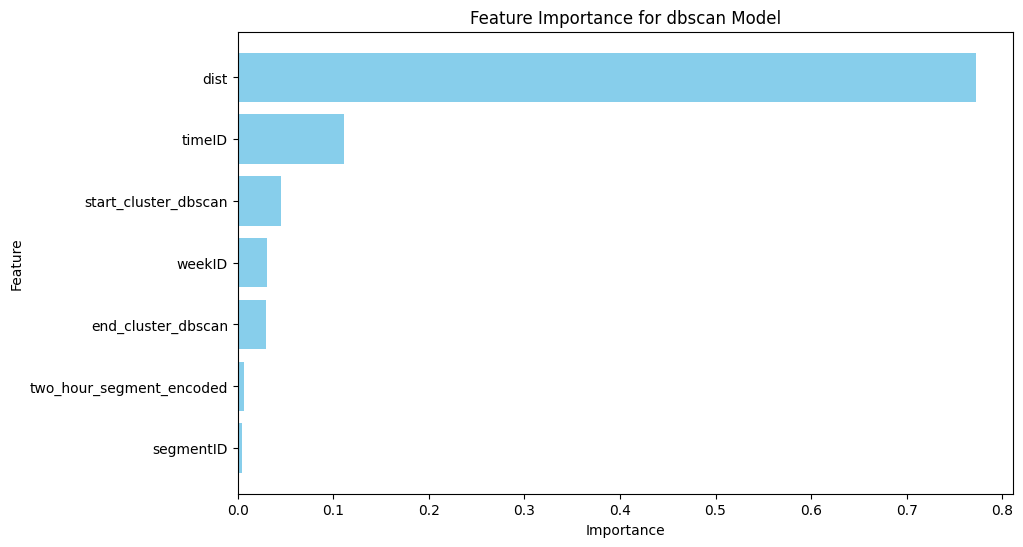

Running RFR for clustering algorithm: hierarchical

Feature Importance for hierarchical Model:
                      feature  importance
0                        dist    0.759354
2                      timeID    0.098619
5  start_cluster_hierarchical    0.062229
6    end_cluster_hierarchical    0.040471
1                      weekID    0.028894
4    two_hour_segment_encoded    0.006005
3                   segmentID    0.004428


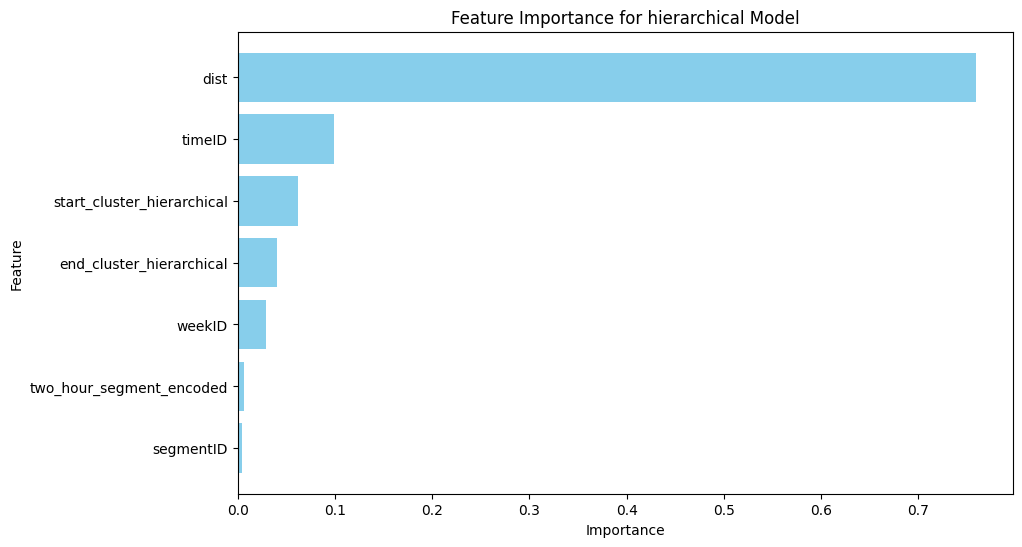

Running RFR for clustering algorithm: sting

Feature Importance for sting Model:
                    feature  importance
0                      dist    0.760033
2                    timeID    0.099362
5       start_cluster_sting    0.061081
6         end_cluster_sting    0.040079
1                    weekID    0.029068
4  two_hour_segment_encoded    0.006224
3                 segmentID    0.004152


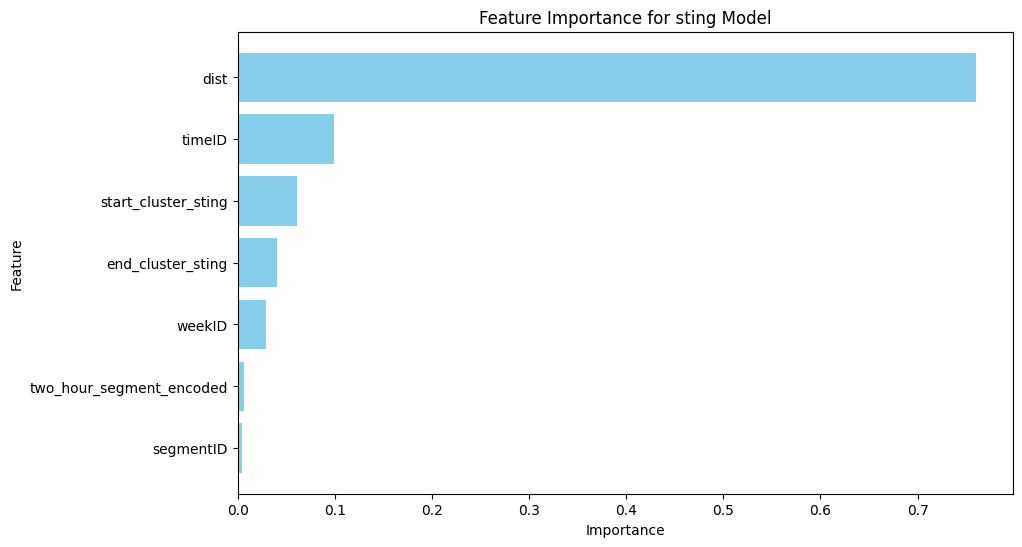

Running RFR for clustering algorithm: clique

Feature Importance for clique Model:
                    feature  importance
0                      dist    0.759832
2                    timeID    0.098180
5      start_cluster_clique    0.062321
6        end_cluster_clique    0.040247
1                    weekID    0.029095
4  two_hour_segment_encoded    0.006172
3                 segmentID    0.004152


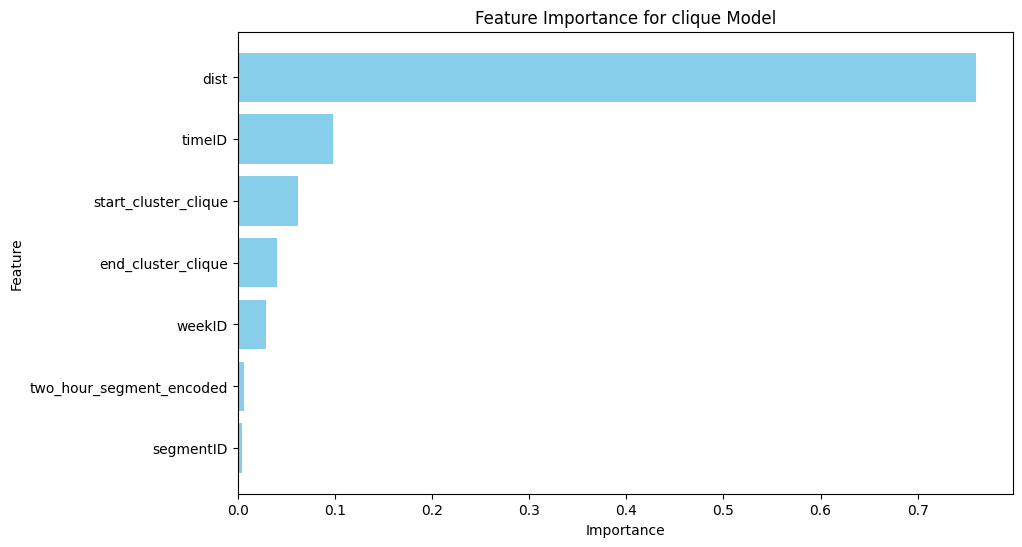

                                             trip_id  actual_eta  \
0  011332faae79852124ca91fff1ed4757dfa63ede73e595...       567.0   
1  450a8935d83494b0e31c5d294774c604eabced2f757e43...       986.0   
2  b2c5fed728bdbe415900c53f20a98442d71e45da2cf18f...      1088.0   
3  7ad091f5f519dcceb54765b3940e0886ff8d19122da0a0...       735.0   
4  4b6e4fcb77da6638226f70c3b26dcb58a00ead335630f6...       340.0   

   predicted_eta algorithm  
0         424.35    dbscan  
1         803.04    dbscan  
2         999.09    dbscan  
3         954.86    dbscan  
4         349.90    dbscan  
Results with trip IDs saved to clustered_trip_eta_predictions_with_trip_id.csv
***************************************
Metrics:
      algorithm  Average_RMSE  Average_MAE  Average_R2
0        dbscan    235.872942   166.877259    0.701781
1  hierarchical    234.733960   165.642109    0.704654
2         sting    233.832971   164.468907    0.706917
3        clique    234.298500   165.125745    0.705749


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split

# def run_rfr_for_clustering_without_loop(road_df, clustering_columns, target_column='trip_time'):
#     """
#     Train and evaluate a single RFR model for each clustering algorithm,
#     while storing trip_id in the output for traceability.

#     Parameters:
#     - road_df: DataFrame containing feature data and cluster labels for each algorithm.
#     - clustering_columns: Dictionary where keys are algorithm names and values are column names for clusters.
#     - target_column: Name of the target column for regression.

#     Returns:
#     - results_df: DataFrame with trip_id, actual ETA, and predicted ETA for each clustering algorithm.
#     """
#     # List of relevant feature columns for modeling (excluding trip_id and target column)
#     feature_columns = ['dist', 'weekID', 'timeID', 'segmentID', 'two_hour_segment_encoded']

#     all_results = []  # Store results for each algorithm
#     metrics = []

#     for algorithm, cluster_col in clustering_columns.items():
#         print(f"Running RFR for clustering algorithm: {algorithm}")

#         # Add the specific start and end cluster columns for this algorithm
#         specific_features = feature_columns + [f'start_cluster_{algorithm}', f'end_cluster_{algorithm}']

#         # Check for missing columns
#         missing_columns = [col for col in specific_features if col not in road_df.columns]
#         if missing_columns:
#             print(f"Missing columns for {algorithm}: {missing_columns}. Skipping this algorithm.")
#             continue

#         # Define features and target (exclude trip_id from features but retain it for output)
#         X = road_df[specific_features]
#         y = road_df[target_column]
#         trip_ids = road_df['trip_id']  # Retain trip_id for traceability in the output

#         # Split data into training and testing sets, keeping trip_id with the test set
#         X_train, X_test, y_train, y_test, trip_id_train, trip_id_test = train_test_split(
#             X, y, trip_ids, test_size=0.2, random_state=42
#         )

#         # Train the RFR model
#         model = RandomForestRegressor(random_state=42)
#         model.fit(X_train, y_train)

#         # Predict on test data
#         y_pred = model.predict(X_test)

#         # Calculate metrics
#         rmse = root_mean_squared_error(y_test, y_pred)
#         mae = mean_absolute_error(y_test, y_pred)
#         r2 = r2_score(y_test, y_pred)

#         # Store the predictions and actual values along with trip_id for traceability
#         results = pd.DataFrame({
#             'trip_id': trip_id_test,
#             'actual_eta': y_test,
#             'predicted_eta': y_pred,
#             'algorithm': algorithm
#         })

#         # Store results for the entire algorithm
#         metrics.append({
#             'algorithm': algorithm,
#             'Average_RMSE': rmse,
#             'Average_MAE': mae,
#             'Average_R2': r2
#         })

#         # Display feature importance
#         feature_importance = model.feature_importances_
#         importance_df = pd.DataFrame({
#             'feature': specific_features,
#             'importance': feature_importance
#         }).sort_values(by='importance', ascending=False)

#         print(f"\nFeature Importance for {algorithm} Model:")
#         print(importance_df)

#         # Plot feature importance
#         plt.figure(figsize=(10, 6))
#         plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
#         plt.xlabel('Importance')
#         plt.ylabel('Feature')
#         plt.title(f'Feature Importance for {algorithm} Model')
#         plt.gca().invert_yaxis()  # Highest importance at the top
#         plt.show()


#         # Store results for this algorithm
#         all_results.append(results)

#         # # Print metrics for each algorithm
#         # print(f"{algorithm} - RMSE: {rmse:.3f}, MAE: {mae:.3f}, R^2: {r2:.3f}")

#     # Combine all results into a single DataFrame for analysis
#     final_results_df = pd.concat(all_results, ignore_index=True)
#     return final_results_df, pd.DataFrame(metrics)

# # Define the clustering columns with each algorithm's name and its respective label column in road_df
# clustering_columns = {
#     'dbscan': 'cluster_labels_dbscan',            # Column with cluster labels from DBSCAN
#     'hierarchical': 'cluster_labels_hierarchical', # Column with cluster labels from Hierarchical clustering
#     'sting': 'cluster_labels_sting',               # Column with cluster labels from STING
#     'clique': 'cluster_labels_clique'              # Column with cluster labels from Clique clustering
# }

# # Run the function for RFR modeling and metric comparison without per-cluster looping
# results_df, metrics_df = run_rfr_for_clustering_without_loop(road_df, clustering_columns)

# # Display the combined results with trip_id, actual ETA, predicted ETA, and algorithm for tracing
# print(results_df.head())

# # Save the DataFrame to a CSV file for further analysis
# output_csv = 'clustered_trip_eta_predictions_with_trip_id.csv'
# results_df.to_csv(output_csv, index=False)
# print(f"Results with trip IDs saved to {output_csv}")

# print("***************************************")
# print("Metrics:")
# print(metrics_df)


## RFR Training for all Clustering Algorithms with Random Parameter Search

### Old Code without saving weights and best hyper-parameters

Running RFR with random search for clustering algorithm: dbscan



Feature Importance for dbscan Model (Best Estimator):
                    feature  importance
0                      dist    0.856167
2                    timeID    0.075441
5      start_cluster_dbscan    0.026399
1                    weekID    0.020944
6        end_cluster_dbscan    0.017293
3                 segmentID    0.002454
4  two_hour_segment_encoded    0.001300


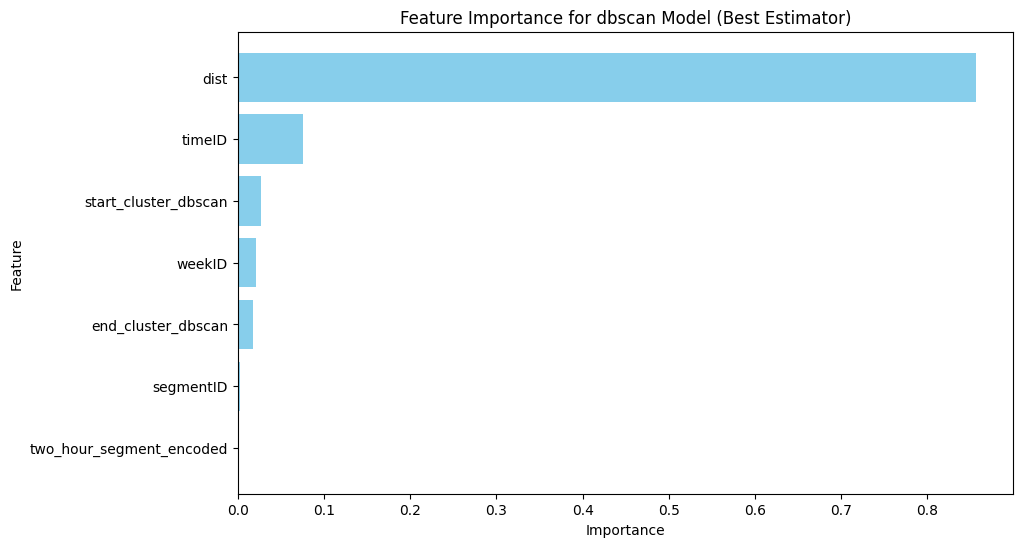

Running RFR with random search for clustering algorithm: hierarchical

Feature Importance for hierarchical Model (Best Estimator):
                      feature  importance
0                        dist    0.847058
2                      timeID    0.070078
5  start_cluster_hierarchical    0.036073
6    end_cluster_hierarchical    0.023653
1                      weekID    0.019662
3                   segmentID    0.002329
4    two_hour_segment_encoded    0.001146


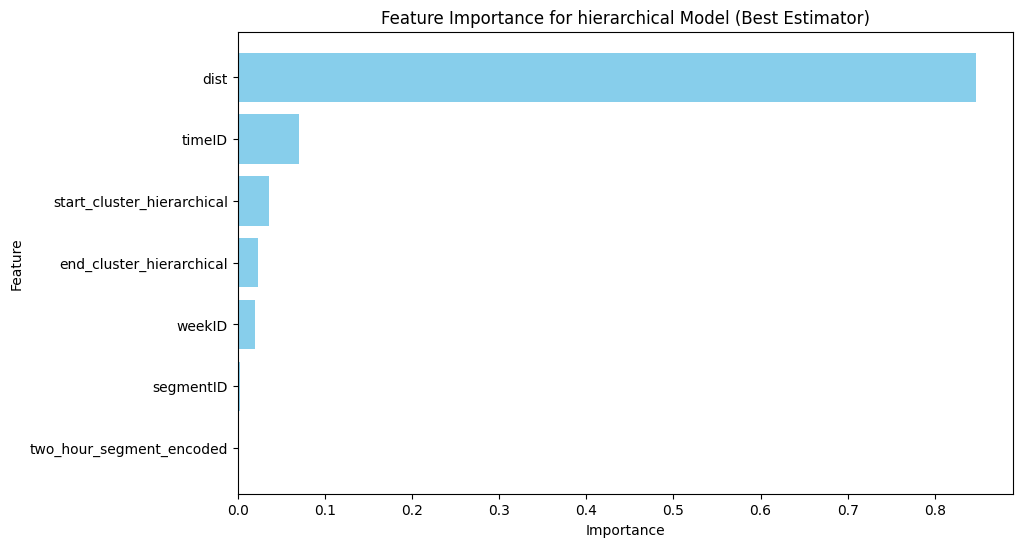

Running RFR with random search for clustering algorithm: sting

Feature Importance for sting Model (Best Estimator):
                    feature  importance
0                      dist    0.846949
2                    timeID    0.070209
5       start_cluster_sting    0.036093
6         end_cluster_sting    0.023439
1                    weekID    0.019875
3                 segmentID    0.002281
4  two_hour_segment_encoded    0.001155


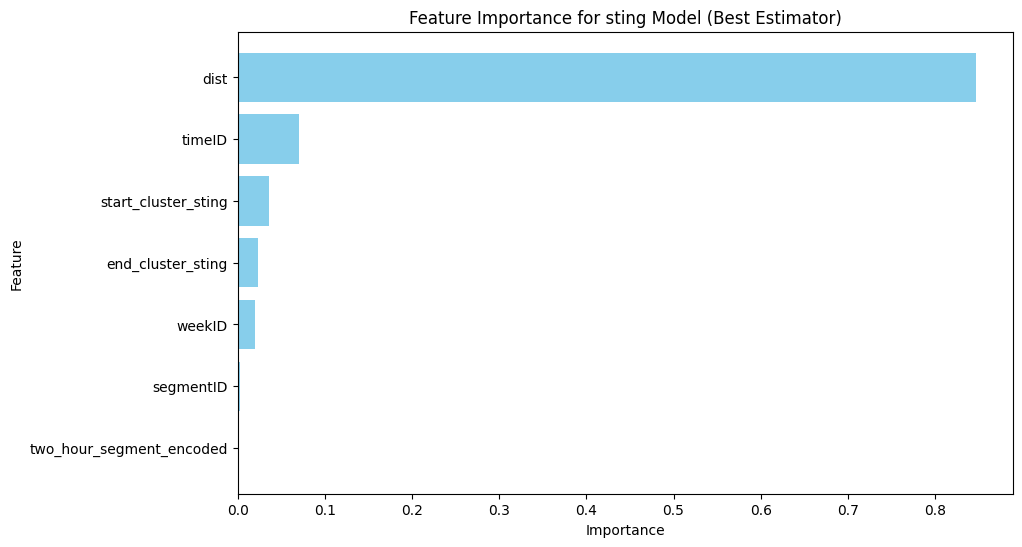

Running RFR with random search for clustering algorithm: clique

Feature Importance for clique Model (Best Estimator):
                    feature  importance
0                      dist    0.847048
2                    timeID    0.069828
5      start_cluster_clique    0.036437
6        end_cluster_clique    0.023386
1                    weekID    0.019861
3                 segmentID    0.002284
4  two_hour_segment_encoded    0.001156


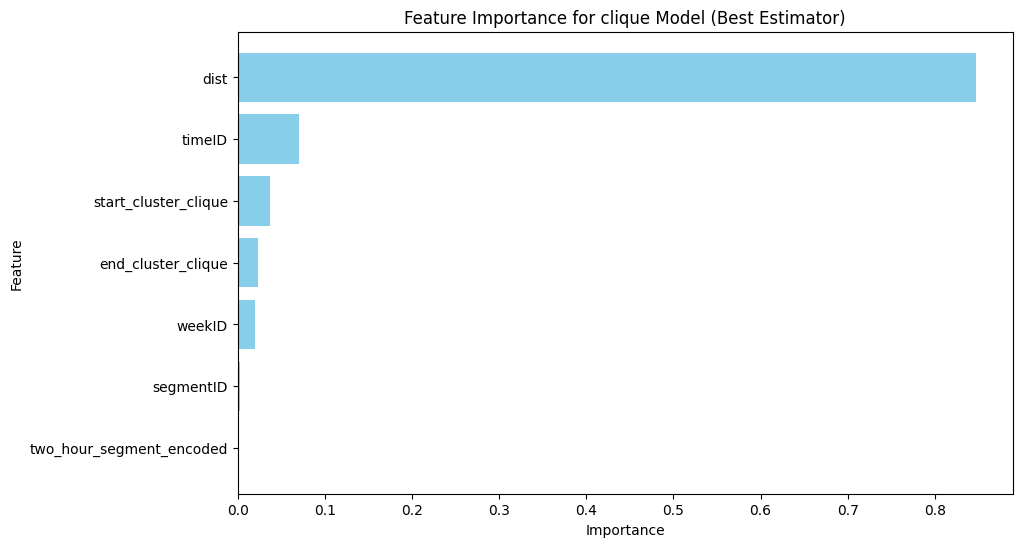

                                             trip_id  actual_eta  \
0  011332faae79852124ca91fff1ed4757dfa63ede73e595...       567.0   
1  450a8935d83494b0e31c5d294774c604eabced2f757e43...       986.0   
2  b2c5fed728bdbe415900c53f20a98442d71e45da2cf18f...      1088.0   
3  7ad091f5f519dcceb54765b3940e0886ff8d19122da0a0...       735.0   
4  4b6e4fcb77da6638226f70c3b26dcb58a00ead335630f6...       340.0   

   predicted_eta algorithm  
0     413.717812    dbscan  
1     797.190841    dbscan  
2     961.845293    dbscan  
3     923.275913    dbscan  
4     301.266367    dbscan  
Results with trip IDs saved to tuned_clustered_trip_eta_predictions_with_trip_id.csv
***************************************
Metrics:
      algorithm  Average_RMSE  Average_MAE  Average_R2
0        dbscan    231.012787   162.115581    0.713944
1  hierarchical    230.383810   161.385036    0.715500
2         sting    229.432778   160.212437    0.717844
3        clique    229.966438   160.703167    0.716530


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# import matplotlib.pyplot as plt

# def run_rfr_with_random_search(road_df, clustering_columns, target_column='trip_time'):
#     """
#     Train and evaluate a single RFR model for each clustering algorithm with random search for hyperparameter tuning.
#     Stores trip_id in the output for traceability.

#     Parameters:
#     - road_df: DataFrame containing feature data and cluster labels for each algorithm.
#     - clustering_columns: Dictionary where keys are algorithm names and values are column names for clusters.
#     - target_column: Name of the target column for regression.

#     Returns:
#     - results_df: DataFrame with trip_id, actual ETA, and predicted ETA for each clustering algorithm.
#     - metrics_df: DataFrame with evaluation metrics for each clustering algorithm.
#     """
#     # List of relevant feature columns for modeling (excluding trip_id and target column)
#     feature_columns = ['dist', 'weekID', 'timeID', 'segmentID', 'two_hour_segment_encoded']

#     all_results = []  # Store results for each algorithm
#     metrics = []

#     # Define hyperparameter grid for Randomized Search
#     param_distributions = {
#         'n_estimators': np.arange(50, 300, 50),
#         'max_depth': [None, 10, 20, 30, 40, 50],
#         'min_samples_split': [2, 5, 10, 15],
#         'min_samples_leaf': [1, 2, 4]
#     }

#     for algorithm, cluster_col in clustering_columns.items():
#         print(f"Running RFR with random search for clustering algorithm: {algorithm}")

#         # Add the specific start and end cluster columns for this algorithm
#         specific_features = feature_columns + [f'start_cluster_{algorithm}', f'end_cluster_{algorithm}']

#         # Check for missing columns
#         missing_columns = [col for col in specific_features if col not in road_df.columns]
#         if missing_columns:
#             print(f"Missing columns for {algorithm}: {missing_columns}. Skipping this algorithm.")
#             continue

#         # Define features and target (exclude trip_id from features but retain it for output)
#         X = road_df[specific_features]
#         y = road_df[target_column]
#         trip_ids = road_df['trip_id']  # Retain trip_id for traceability in the output

#         # Split data into training and testing sets, keeping trip_id with the test set
#         X_train, X_test, y_train, y_test, trip_id_train, trip_id_test = train_test_split(
#             X, y, trip_ids, test_size=0.2, random_state=42
#         )

#         # Randomized Search for hyperparameter tuning
#         model = RandomForestRegressor(random_state=42)
#         random_search = RandomizedSearchCV(
#             estimator=model, param_distributions=param_distributions, 
#             n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=42, n_jobs=-1
#         )
        
#         random_search.fit(X_train, y_train)
#         best_model = random_search.best_estimator_

#         # Predict on test data
#         y_pred = best_model.predict(X_test)

#         # Calculate metrics
#         rmse = root_mean_squared_error(y_test, y_pred)
#         mae = mean_absolute_error(y_test, y_pred)
#         r2 = r2_score(y_test, y_pred)

#         # Store the predictions and actual values along with trip_id for traceability
#         results = pd.DataFrame({
#             'trip_id': trip_id_test,
#             'actual_eta': y_test,
#             'predicted_eta': y_pred,
#             'algorithm': algorithm
#         })

#         # Store results for the entire algorithm
#         metrics.append({
#             'algorithm': algorithm,
#             'Average_RMSE': rmse,
#             'Average_MAE': mae,
#             'Average_R2': r2
#         })

#         # Display feature importance
#         feature_importance = best_model.feature_importances_
#         importance_df = pd.DataFrame({
#             'feature': specific_features,
#             'importance': feature_importance
#         }).sort_values(by='importance', ascending=False)

#         print(f"\nFeature Importance for {algorithm} Model (Best Estimator):")
#         print(importance_df)

#         # Plot feature importance
#         plt.figure(figsize=(10, 6))
#         plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
#         plt.xlabel('Importance')
#         plt.ylabel('Feature')
#         plt.title(f'Feature Importance for {algorithm} Model (Best Estimator)')
#         plt.gca().invert_yaxis()  # Highest importance at the top
#         plt.show()

#         # Store results for this algorithm
#         all_results.append(results)

#     # Combine all results into a single DataFrame for analysis
#     final_results_df = pd.concat(all_results, ignore_index=True)
#     metrics_df = pd.DataFrame(metrics)

#     return final_results_df, metrics_df

# # Define the clustering columns with each algorithm's name and its respective label column in road_df
# clustering_columns = {
#     'dbscan': 'cluster_labels_dbscan',            # Column with cluster labels from DBSCAN
#     'hierarchical': 'cluster_labels_hierarchical', # Column with cluster labels from Hierarchical clustering
#     'sting': 'cluster_labels_sting',               # Column with cluster labels from STING
#     'clique': 'cluster_labels_clique'              # Column with cluster labels from Clique clustering
# }

# # Run the function for RFR modeling with random search and metric comparison
# results_df, metrics_df = run_rfr_with_random_search(road_df, clustering_columns)

# # Display the combined results with trip_id, actual ETA, predicted ETA, and algorithm for tracing
# print(results_df.head())

# # Save the DataFrame to a CSV file for further analysis
# output_csv = 'tuned_clustered_trip_eta_predictions_with_trip_id.csv'
# results_df.to_csv(output_csv, index=False)
# print(f"Results with trip IDs saved to {output_csv}")

# print("***************************************")
# print("Metrics:")
# print(metrics_df)


In [ ]:
Change directory here

SyntaxError: invalid syntax (987045900.py, line 1)

In [ ]:
os.getcwd()

In [ ]:
# Here
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt
import pickle

def run_rfr_with_random_search(road_df, clustering_columns, target_column='trip_time'):
    feature_columns = ['dist', 'weekID', 'timeID', 'segmentID', 'two_hour_segment_encoded']

    all_results = []  # Store results for each algorithm
    metrics = []
    best_params = {}

    # Define hyperparameter grid for Randomized Search
    param_distributions = {
        'n_estimators': np.arange(50, 300, 50),
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4]
    }

    for algorithm, cluster_col in clustering_columns.items():
        print(f"Running RFR with random search for clustering algorithm: {algorithm}")

        # Add the specific start and end cluster columns for this algorithm
        specific_features = feature_columns + [f'start_cluster_{algorithm}', f'end_cluster_{algorithm}']

        # Check for missing columns
        missing_columns = [col for col in specific_features if col not in road_df.columns]
        if missing_columns:
            print(f"Missing columns for {algorithm}: {missing_columns}. Skipping this algorithm.")
            continue

        # Define features and target (exclude trip_id from features but retain it for output)
        X = road_df[specific_features]
        y = road_df[target_column]
        trip_ids = road_df['trip_id']  # Retain trip_id for traceability in the output

        # Split data into training and testing sets, keeping trip_id with the test set
        X_train, X_test, y_train, y_test, trip_id_train, trip_id_test = train_test_split(
            X, y, trip_ids, test_size=0.2, random_state=42
        )

        # Randomized Search for hyperparameter tuning
        model = RandomForestRegressor(random_state=42)
        random_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_distributions, 
            n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=42, n_jobs=-1
        )
        
        random_search.fit(X_train, y_train)
        best_model = random_search.best_estimator_
        best_hyperparameters = random_search.best_params_

        # Save best hyperparameters for this algorithm
        best_params[algorithm] = best_hyperparameters

        model_filename = f'{algorithm}_best_rfr_model.pkl'
        with open(model_filename, 'wb') as model_file:
            pickle.dump(best_model, model_file)
        print(f"Trained model for {algorithm} saved as {model_filename}")

        # Predict on test data
        y_pred = best_model.predict(X_test)

        # Calculate metrics
        rmse = root_mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the predictions and actual values along with trip_id for traceability
        results = pd.DataFrame({
            'trip_id': trip_id_test,
            'actual_eta': y_test,
            'predicted_eta': y_pred,
            'algorithm': algorithm
        })

        # Store results for the entire algorithm
        metrics.append({
            'algorithm': algorithm,
            'Average_RMSE': rmse,
            'Average_MAE': mae,
            'Average_R2': r2,
            'Best_Hyperparameters': best_hyperparameters
        })

        # Display feature importance
        feature_importance = best_model.feature_importances_
        importance_df = pd.DataFrame({
            'feature': specific_features,
            'importance': feature_importance
        }).sort_values(by='importance', ascending=False)

        print(f"\nFeature Importance for {algorithm} Model (Best Estimator):")
        print(importance_df)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title(f'Feature Importance for {algorithm} Model (Best Estimator)')
        plt.gca().invert_yaxis()  # Highest importance at the top
        plt.show()

        # Store results for this algorithm
        all_results.append(results)

    # Combine all results into a single DataFrame for analysis
    final_results_df = pd.concat(all_results, ignore_index=True)

    with open('best_hyperparameters.pkl', 'wb') as params_file:
        pickle.dump(best_params, params_file)
    print("Best hyperparameters saved as 'best_hyperparameters.pkl'")

    metrics_df = pd.DataFrame(metrics)

    return final_results_df, metrics_df

# Define the clustering columns with each algorithm's name and its respective label column in road_df
clustering_columns = {
    'dbscan': 'cluster_labels_dbscan',            # Column with cluster labels from DBSCAN
    'hierarchical': 'cluster_labels_hierarchical', # Column with cluster labels from Hierarchical clustering
    'sting': 'cluster_labels_sting',               # Column with cluster labels from STING
    'clique': 'cluster_labels_clique'              # Column with cluster labels from Clique clustering
}

# Run the function for RFR modeling with random search and metric comparison
results_df, metrics_df = run_rfr_with_random_search(road_df, clustering_columns)

# Display the combined results with trip_id, actual ETA, predicted ETA, and algorithm for tracing
print(results_df.head())

# Save the DataFrame to a CSV file for further analysis
output_csv = 'tuned_clustered_trip_eta_predictions_with_trip_id.csv'
results_df.to_csv(output_csv, index=False)
print(f"Results with trip IDs saved to {output_csv}")

print("***************************************")
print("Metrics:")
print(metrics_df)


In [ ]:
# dump road_df to csv
road_df.to_csv('road_df.csv', index=False)

In [ ]:
road_df.columns

Index(['trip_id', 'time_gap', 'dist', 'trip_time', 'driverID', 'weekID',
       'timeID', 'dateID', 'dist_gap', 'lats', 'lngs', 'time_offset',
       'segmentID', 'two_hour_segment', 'hour', 'start_cluster', 'end_cluster',
       'start_cluster_dbscan', 'end_cluster_dbscan', 'same_cluster_dbscan',
       'start_cluster_sting', 'end_cluster_sting', 'same_cluster_sting',
       'start_cluster_clique', 'end_cluster_clique', 'same_cluster_clique',
       'start_cluster_hierarchical', 'end_cluster_hierarchical',
       'same_cluster_hierarchical', 'unique_trip'],
      dtype='object')

In [ ]:
road_df['driverID'].nunique()

3543

In [ ]:
# display statistics for each driver
driver_stats = road_df.groupby('driverID')['trip_time'].agg(['count', 'mean', 'std', 'min', 'max'])
driver_stats.head(10)


,count,mean,std,min,max
driverID,,,,,
00026bdabb9ed4160a3e034d3283863a5c068943284a728397dc441714cedce0,18,547.444444,407.304081,25.0,1132.0
000446c37bb324390e0837bb939a4c59c3ac9527f94ffc4a0b1650a4fc468c38,1,370.000000,NaN,370.0,370.0
000b0c279a96e0d589bd7d0b8e3cd517a16d93767addb59574644b1e0ffe4294,34,648.794118,546.681104,40.0,2482.0
00148873a62dea02f169caeb7ba055a92e0e328068af7f150812ac07e72ff1d6,5,1022.600000,826.667587,305.0,2019.0
0015d25a5ad155bcb44d2eb8c78d36c1194fdccf8ec55e83e784d97e3ac536f2,17,569.941176,553.541154,21.0,2069.0
001fa75d9e4d0a789805f956d909daf705263be7ecbc663492d0c99993974315,22,718.318182,649.905589,120.0,2624.0
002d7057ed249da67e1c7a9280271e76c445fbff58aa35810c7a69ee7bd3c2df,12,491.166667,379.119514,55.0,1289.0
0042f35ff25fc76506f3f77e5a4ebad90074491fd821661ff4530f496a22c65b,2,555.000000,650.538239,95.0,1015.0
0048f04b804f6c3d37331738d87d5293c1cdd3230fc943584d4efac7012a139c,8,382.250000,289.536452,79.0,840.0


In [ ]:
road_df['trip_id'].nunique()

34887

In [ ]:
# columns that will be involved in modeling: dist, trip_time, driverID, weekID, timeID, segmentID, two_hour_segment, start_cluster_{algorithm}, end_cluster_{algorithm}

In [ ]:
# TODO:
# - Overfitting/Underfitting Inspection
# - DriverID Analysis
# - Driver ID Feature Engineering

# Capturing Drivers' Behavior - Encoding DriverID